# Intro
As computer science students with a deep interest in data science, we, Hila Giladi (312557606) and Kfir Shuster (315695122), have chosen to focus on heart disease prediction and analysis. We are committed to leveraging data science to better understand risk factors and potentially help improve early detection and prevention strategies. Through careful analysis of various health metrics and lifestyle factors, we aim to contribute to the broader understanding of heart disease risk factors and their complex interactions.

# The Problem
Our analysis of the data reveals a complex picture of the challenges in understanding heart disease factors. While approximately 8.6% of the population in our dataset suffers from heart disease, our analysis uncovers an intricate web of relationships between various risk factors, ranging from demographic factors such as age and gender, through lifestyle habits like smoking and physical activity, to existing medical conditions such as diabetes and stroke. This complexity emphasizes the need for a comprehensive and multidimensional approach to understanding heart disease risk.

# The Importance of the Solution
Heart disease remains one of the leading causes of mortality worldwide, making it a critical public health concern. Understanding and predicting heart disease risk isn't just about extending life expectancy - it's about improving quality of life and reducing the enormous burden on healthcare systems and families.

# How We're Going to Do It
Heart disease is a complex health issue influenced by numerous factors, and we aim to address this complexity through a comprehensive analysis approach. This project will develop a predictive model for heart disease risk using a dataset that captures various physiological, behavioral, and demographic factors, including BMI, physical health metrics, lifestyle factors, and various health conditions.

By leveraging machine learning techniques to predict heart disease risk, we aim to:
- Identify key factors that influence heart disease risk and their relative importance
- Understand the complex relationships between lifestyle choices, existing health conditions, and heart disease
- Develop models that could assist in early risk identification and intervention

Through this analysis, we hope to contribute to the broader understanding of heart disease risk factors and potentially develop tools that could help individuals and healthcare providers in monitoring and improving heart health outcomes. Our approach combines statistical analysis, machine learning, and data visualization to uncover patterns and relationships that might not be immediately apparent, potentially leading to more effective prevention strategies and early intervention opportunities.

# Data Collection and Selection Process
We utilized a comprehensive dataset containing 319,795 records with 18 different variables, covering a wide range of metrics:
- Physiological measures: BMI, physical health
- Lifestyle habits: smoking, alcohol consumption, physical activity, sleep hours
- Health conditions: diabetes, stroke, asthma, kidney disease
- Demographic characteristics: age, sex, race

This dataset was selected for its extensive scope and rich variety of variables, allowing us to examine the complex relationships between various factors and heart disease. The data provides a solid foundation for in-depth analysis and the development of predictive models that may help improve our understanding of heart disease risk factors and enhance early detection capabilities.

# Data Analysis
Let's transform our collected data into a structured pandas data frame to examine the information we've gathered. This will give us a clear view of our dataset's contents and help us understand what we're working with.

In [16]:
import pandas as pd
df = pd.read_csv('heart_2020_cleaned.csv')
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Data Preprocessing:
## Converting Categorical Variables
1. Convert binary variables from Yes/No to 1/0:
   - Applied to health conditions and behaviors like HeartDisease, Smoking, AlcoholDrinking etc.
   - Special handling for KidneyDisease to ensure integer type conversion

2. Restructure age categories into broader 10-year groups:
   - Original categories (e.g., "18-24", "25-29") consolidated into decade spans
   - New categories range from "18-29" to "80+"
   - Includes error handling for unknown categories

In [17]:
pd.set_option('future.no_silent_downcasting', True)
binary_columns = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'PhysicalActivity', 'Asthma',
        'KidneyDisease', 'SkinCancer'
    ]
# Map Yes/No to 1/0
for column in binary_columns:
    if column == 'KidneyDisease':
        df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0}).astype(int)

    else:
        df[column] = df[column].map({'Yes': 1, 'No': 0})


def get_age_group_10_years(age_category):
   """
   Takes the original age category and returns a new 10-year category

   Parameters:
   age_category (str): Original age category (e.g. "18-24", "25-29" etc.)

   Returns:
   str: New age category ("18-29", "30-39" etc.)
   """
   if age_category in ['18-24', '25-29']:
       return '18-29'
   elif age_category in ['30-34', '35-39']:
       return '30-39'
   elif age_category in ['40-44', '45-49']:
       return '40-49'
   elif age_category in ['50-54', '55-59']:
       return '50-59'
   elif age_category in ['60-64', '65-69']:
       return '60-69'
   elif age_category in ['70-74', '75-79']:
       return '70-79'
   elif age_category == '80 or older':
       return '80+'
   else:
       return 'Unknown'

# Add new age group column
df['AgeCategory'] = df['AgeCategory'].apply(get_age_group_10_years)

display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,50-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80+,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,60-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,70-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-49,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-69,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,30-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,40-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,18-29,Hispanic,No,0,Good,12.0,0,0,0


## Data Cleaning: Filter Sleep Duration Values
Removed unrealistic sleep duration values by limiting the range to 1-16 hours per day, eliminating extreme outliers that likely represent data entry errors or measurement mistakes.

In [18]:
df = df[(df['SleepTime'] >= 1) & (df['SleepTime'] <= 16)]

# EDA
## Basic histogram of the prediction column
### Distribution of heart disease cases in our population
Create a basic histogram to display the distribution of heart disease cases in our population. The purpose of this graph is to provide a clear picture of the ratio between people with and without heart disease in our dataset.

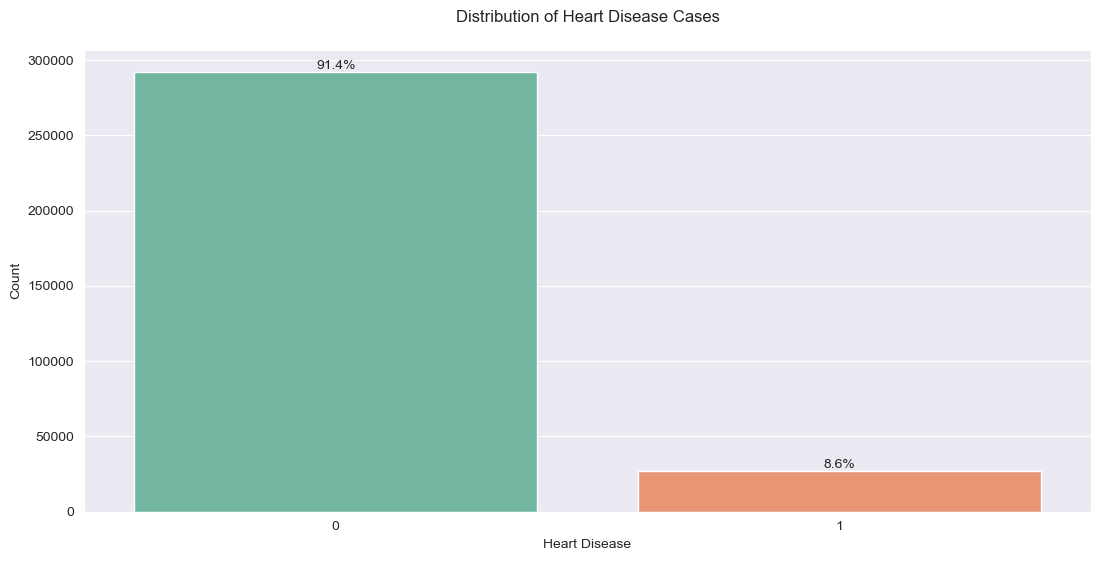

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(13, 6))

# Create histogram/count plot with updated syntax
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)

# Calculate percentages
total = len(df['HeartDisease'])
percentages = df['HeartDisease'].value_counts(normalize=True) * 100

# Add percentage labels on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, df['HeartDisease'].value_counts()[i],
             f'{percentage:.1f}%',
             horizontalalignment='center',
             verticalalignment='bottom')

# Customize the plot
plt.title('Distribution of Heart Disease Cases', pad=20)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show plot
plt.show()

The graph reveals a significant class imbalance where 91.4% (approximately 280,000 individuals) do not have heart disease, while only 8.6% (around 25,000 individuals) have heart disease.

### Distribution of Heart Disease by Race
Create a bar plot to show the distribution of heart disease cases across different racial groups, allowing us to identify any potential patterns or disparities in heart disease prevalence among different ethnic groups

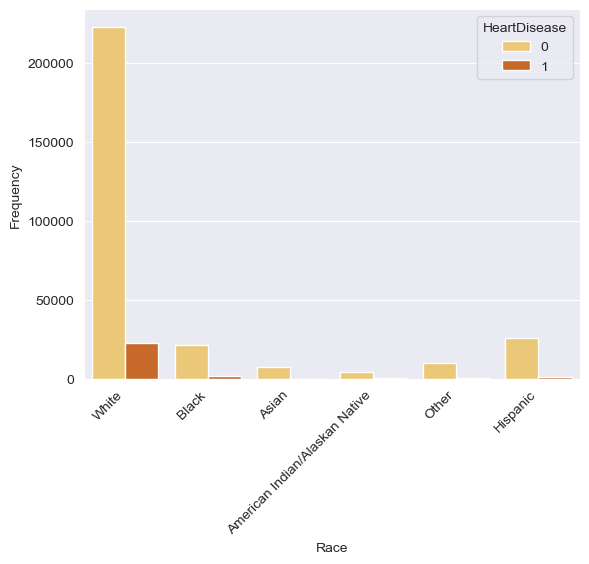

In [20]:
sns.countplot(data=df, x='Race', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows that White individuals make up the largest portion of the dataset with approximately 220,000 cases, while other racial groups have significantly smaller representations. All racial groups maintain a similar proportion of heart disease cases relative to their population size.

### Distribution of Heart Disease by Sex
Create a bar plot comparing the distribution of heart disease between males and females to understand if there are any gender-based differences in heart disease prevalence.

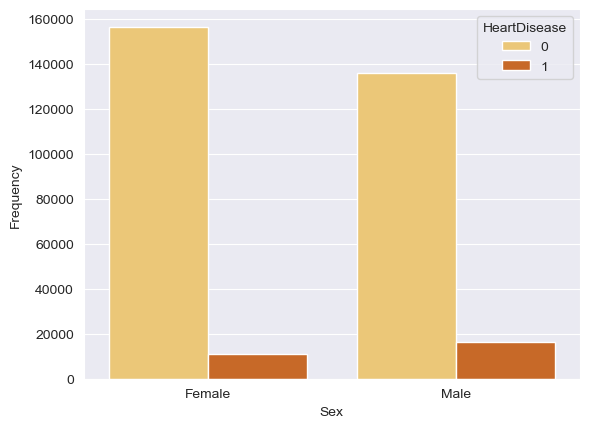

In [21]:
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

The visualization shows that females have a slightly higher total frequency (approximately 155,000 cases) compared to males (approximately 135,000 cases). Both genders display a similar pattern of heart disease distribution, with the majority not having heart disease.

### Distribution of Heart Disease by Age Category
Create a bar plot to examine how heart disease prevalence varies across different age groups, using ordered age categories to show the progression of risk with age.

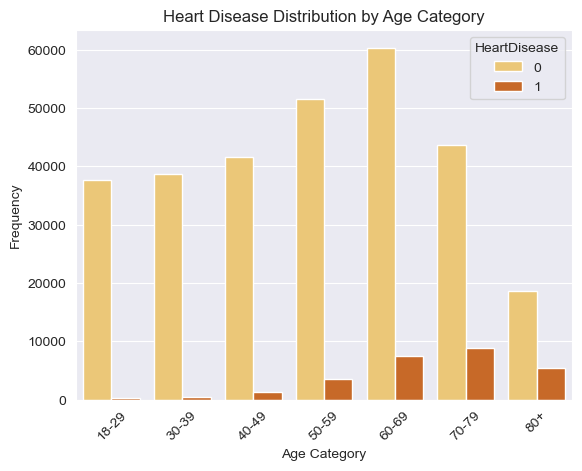

In [22]:
# create ordered list of age categories
age_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# create the countplot with ordered categories
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease',
              palette='YlOrBr', order=age_order)
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Heart Disease Distribution by Age Category')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

The 60-69 age group has the highest frequency with approximately 60,000 cases, followed by the 50-59 age group. The incidence of heart disease (represented by lighter brown) increases notably with age, showing higher proportions in older age groups (60-69, 70-79, and 80+).

## Correlation Matrix of Health Variables
Create a correlation matrix heatmap to visualize the relationships between various health-related variables, helping identify which factors are most strongly associated with heart disease.


First we convert the non-numeric columns to numeric columns for the correlation matrix.


In [23]:
df_copy = df.copy()

# Sex mapping
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0})

# Age mapping
age_map = {
    '18-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80+': 7
}
df_copy['AgeCategory'] = df_copy['AgeCategory'].replace(age_map)

# Race mapping
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian': 2,
    'American Indian/Alaskan Native': 3,
    'Hispanic': 4,
    'Other': 5
}
df_copy['Race'] = df_copy['Race'].replace(race_mapping)

# Diabetic mapping
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df_copy['Diabetic'] = df_copy['Diabetic'].replace(diabetic_mapping)

# General Health mapping
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df_copy['GenHealth'] = df_copy['GenHealth'].replace(genhealth_mapping)
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0}).astype(int)
display(df_copy)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,4,0,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,7,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,5,0,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,3,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,5,4,3,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,2,4,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,3,4,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,4,0,0,2,12.0,0,0,0


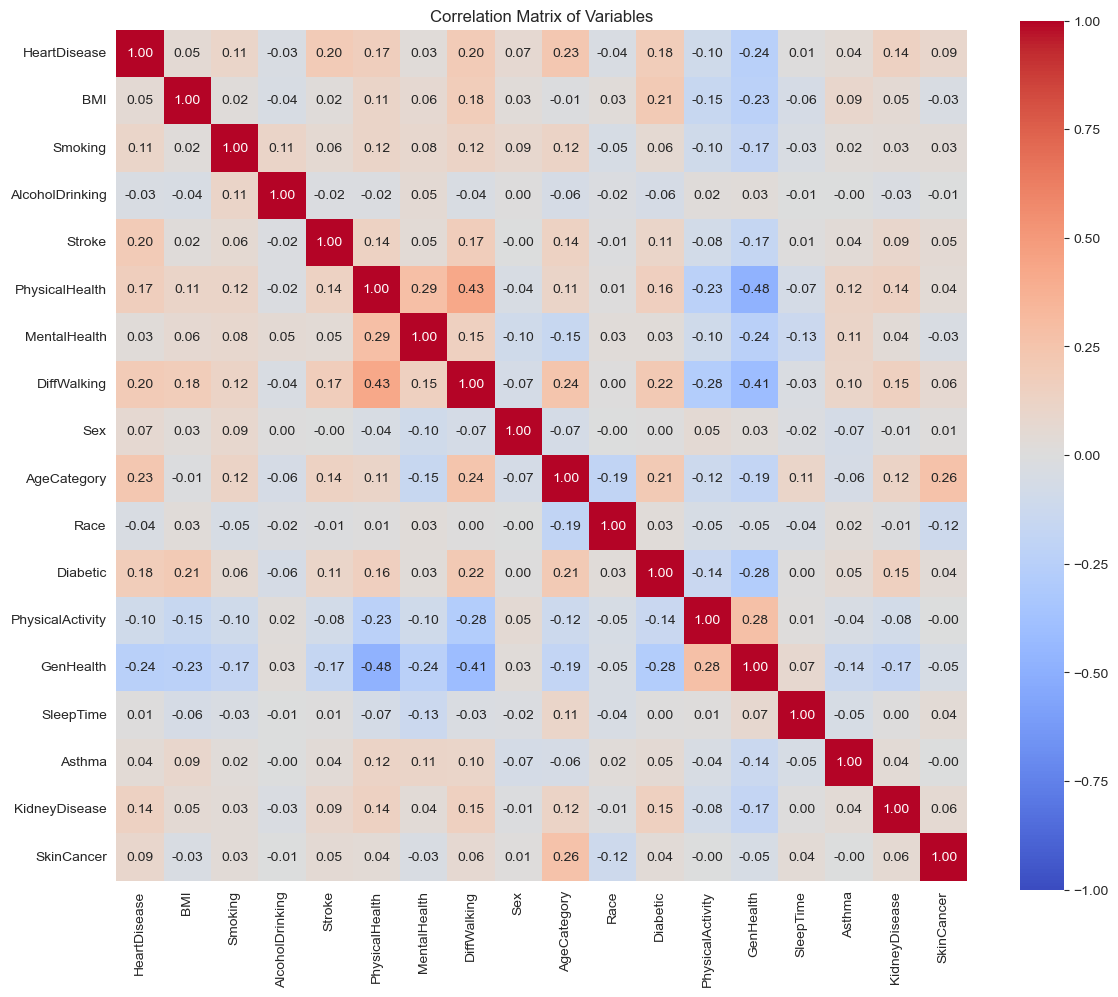

In [24]:
# Create correlation matrix
correlation_matrix = df_copy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,          # show correlation values
            cmap='coolwarm',     # color scheme
            center=0,            # center the colormap at 0
            fmt='.2f',          # show 2 decimal places
            square=True,         # make the plot square-shaped
            vmin=-1, vmax=1)     # set the range of values

plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

This correlation matrix shows the relationships between various health-related variables, with stronger correlations indicated by darker colors and numerical values ranging from -1 to 1. The most notable correlations with heart disease (HeartDisease) include: age category (0.23), stroke (0.20), difficulty walking (0.20), physical health (0.17), and diabetic status (0.18), while showing negative correlations with general health (-0.24) and physical activity (-0.10). There's a particularly strong negative correlation (-0.48) between physical health and general health, suggesting that poor physical health significantly impacts overall health perception. Interestingly, factors like BMI (0.05), alcohol drinking (-0.03), and race (-0.04) show relatively weak correlations with heart disease.

## Heart Disease Distribution by Lifestyle Habits
Create a bar plot showing the percentage of heart disease cases across different combinations of smoking and alcohol consumption habits.

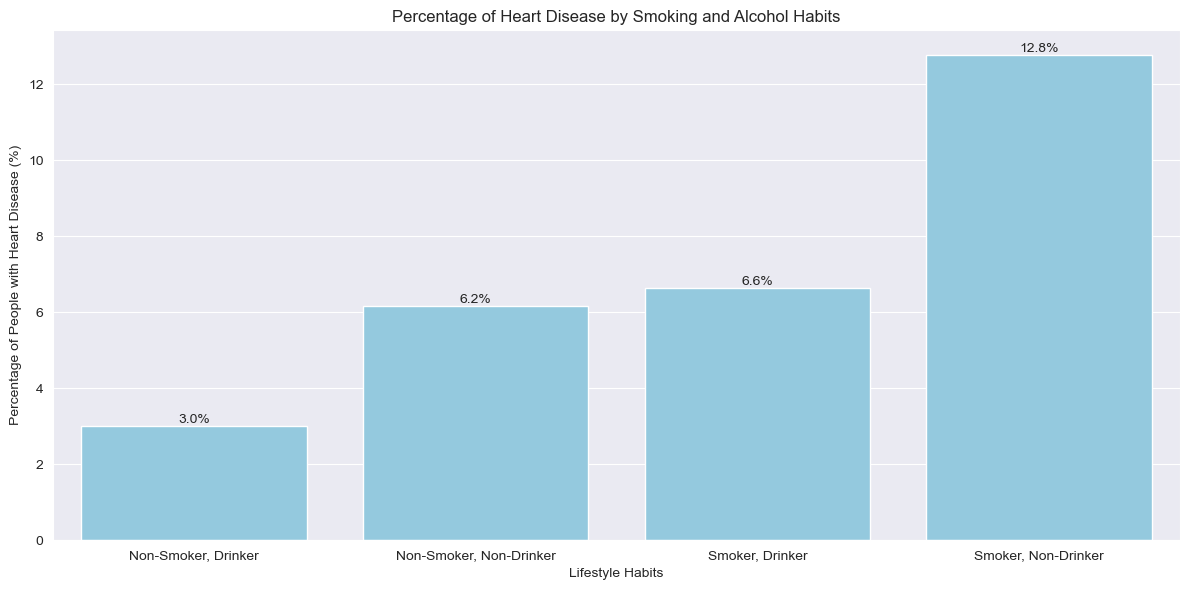

In [25]:
# read the data again to avoid changes that affect the next graph
df_smoke_drink = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining smoking and alcohol status
df_smoke_drink['Habits'] = (df_smoke_drink['Smoking'].map({'Yes': 'Smoker', 'No': 'Non-Smoker'}) + ', ' +
                df_smoke_drink['AlcoholDrinking'].map({'Yes': 'Drinker', 'No': 'Non-Drinker'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_smoke_drink.groupby('Habits')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Habits',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Smoking and Alcohol Habits')
plt.xlabel('Lifestyle Habits')

plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

Smokers who don't drink have the highest prevalence of heart disease (12.8%), while non-smokers who drink show the lowest (3.0%). This aligns with the correlation matrix which showed smoking had a positive correlation with heart disease (0.11), indicating increased risk. Interestingly, alcohol drinking showed a very weak negative correlation (-0.03), explaining why categories involving drinking (non-smoker drinker at 3.0% and smoker drinker at 6.6%) show lower heart disease percentages than their non-drinking counterparts.

## Distribution of Heart Disease by Physical Activity and Health Status
Create a bar plot comparing heart disease rates across different combinations of physical activity levels and general health status.


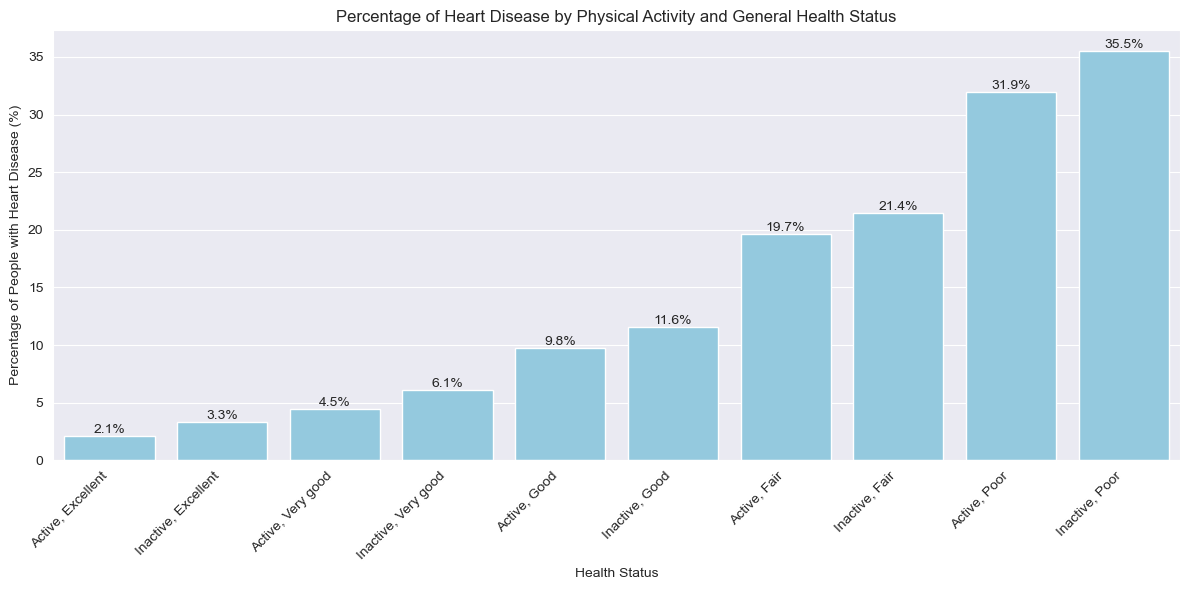

In [26]:
# read the data again to avoid changes that affect the next graph
df_physic_gen = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining physical activity and general health status
df_physic_gen['Health_Status'] = (df_physic_gen['PhysicalActivity'].map({'Yes': 'Active', 'No': 'Inactive'}) + ', ' +
                      df_physic_gen['GenHealth'])

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_gen.groupby('Health_Status')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Status',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical Activity and General Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The data shows a progression from 2.1% (active, excellent health) to 35.5% (inactive, poor health) in heart disease risk. This pattern aligns with the correlation matrix, which showed negative correlations between heart disease and both physical activity (-0.10) and general health (-0.24), indicating that better health status and physical activity are associated with lower heart disease risk. The stronger correlation with general health is reflected in the more dramatic increases in heart disease rates as health status declines

## Distribution of Heart Disease by Physical and Mental Health Days
Create a bar plot showing how heart disease prevalence varies with different combinations of physical and mental health issue days.

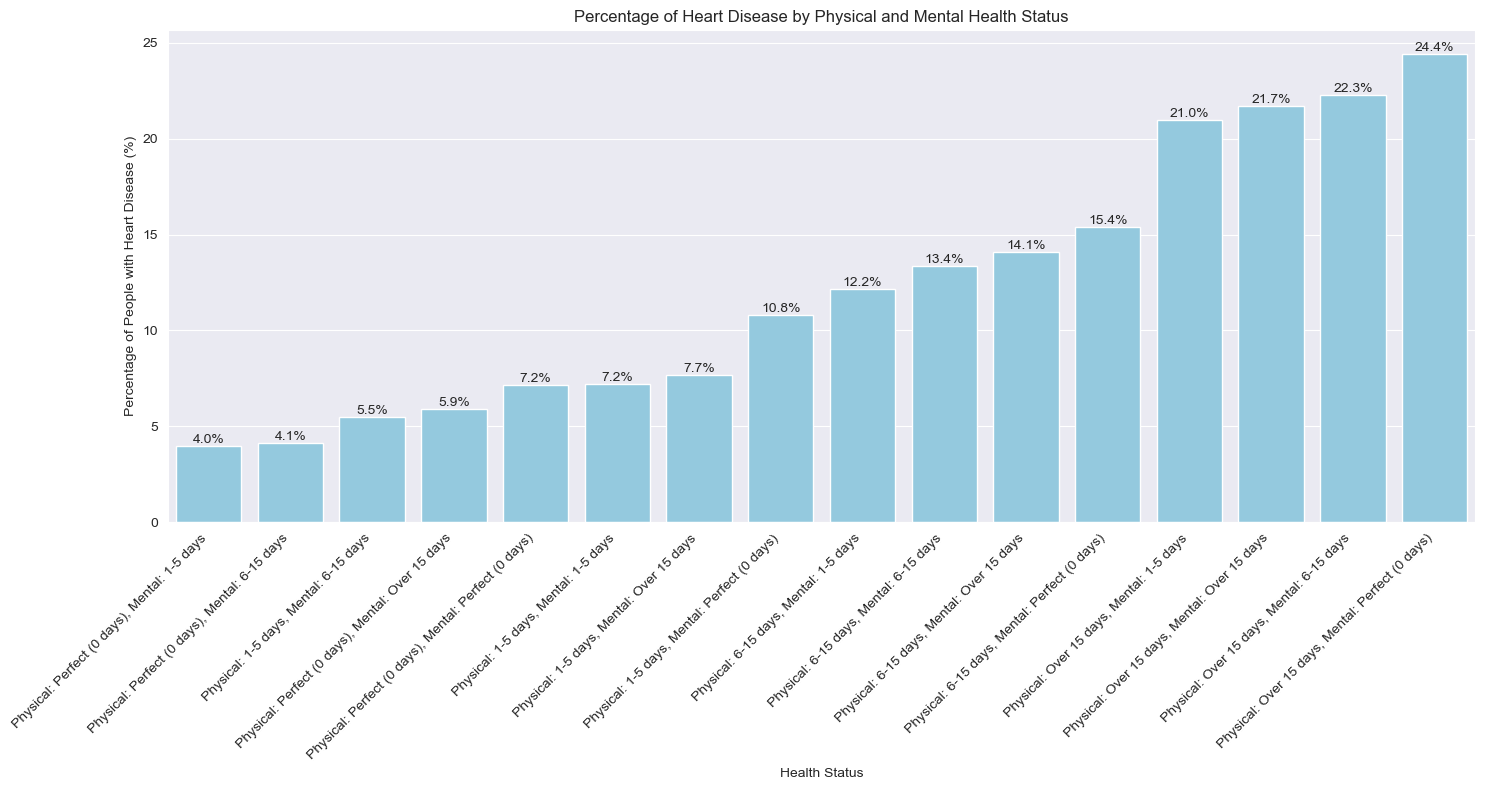

In [27]:
# read the data again to avoid changes that affect the next graph
df_physic_mental = pd.read_csv('heart_2020_cleaned.csv')

# create categories for Physical and Mental Health
def categorize_health(value):
   if value == 0:
       return 'Perfect (0 days)'
   elif value <= 5:
       return '1-5 days'
   elif value <= 15:
       return '6-15 days'
   else:
       return 'Over 15 days'

# create new columns with categorized health values
df_physic_mental['PhysicalHealth_Cat'] = df_physic_mental['PhysicalHealth'].apply(categorize_health)
df_physic_mental['MentalHealth_Cat'] = df_physic_mental['MentalHealth'].apply(categorize_health)

# create a new column combining both health categories
df_physic_mental['Health_Status'] = 'Physical: ' + df_physic_mental['PhysicalHealth_Cat'] + ', Mental: ' + df_physic_mental['MentalHealth_Cat']

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_mental.groupby('Health_Status')['HeartDisease'].apply(
   lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Health_Status',
                y='HeartDisease',
                data=heart_disease_stats,
                color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
   ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical and Mental Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Heart disease rates increase from 4.0% (perfect physical health, minimal mental health issues) to 24.4% (over 15 days of both issues). The correlation matrix supports these patterns, showing physical health had a stronger correlation (0.17) with heart disease compared to mental health (0.03). This explains why we see larger jumps in heart disease rates when physical health days increase versus changes in mental health days

## Heart Disease by Diabetes and Stroke Status

Create a bar plot comparing heart disease rates across different combinations of diabetes and stroke conditions.

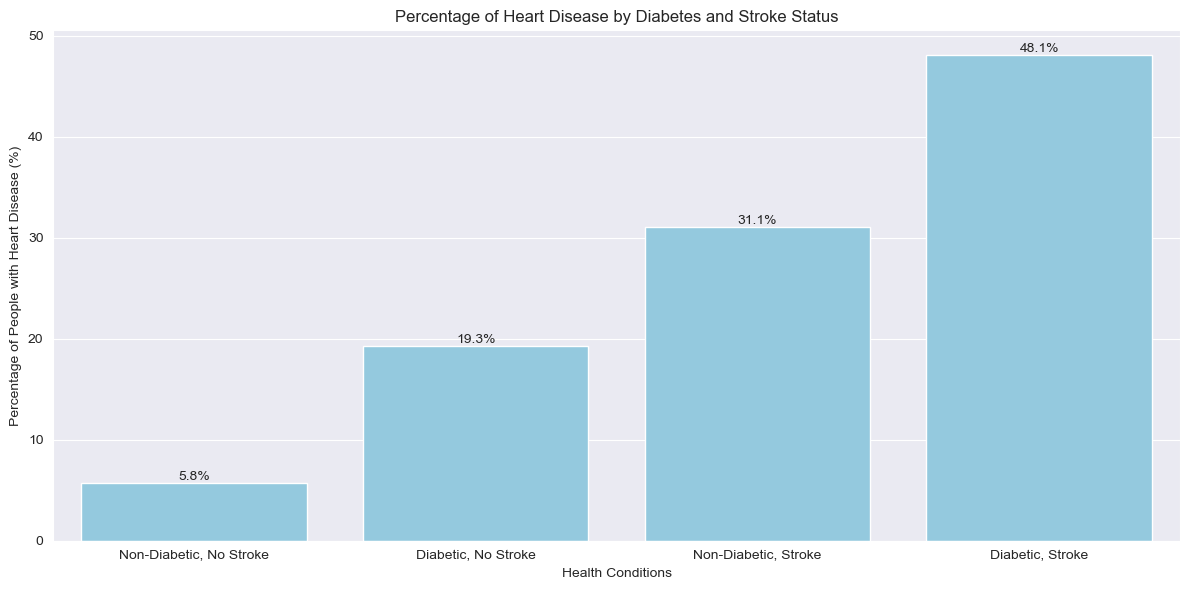

In [28]:
# read the data again to avoid changes that affect the next graph
df_diabetic_stroke = pd.read_csv('heart_2020_cleaned.csv')

# create a combination of health conditions
df_diabetic_stroke['Health_Conditions'] = (df_diabetic_stroke['Diabetic'].map({'Yes': 'Diabetic', 'No': 'Non-Diabetic'}) + ', ' +
                                           df_diabetic_stroke['Stroke'].map({'Yes': 'Stroke', 'No': 'No Stroke'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_diabetic_stroke.groupby('Health_Conditions')['HeartDisease'].apply(
   lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Conditions',
                y='HeartDisease',
                data=heart_disease_stats,
                color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
   ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Diabetes and Stroke Status')
plt.xlabel('Health Conditions')
plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

The progression from 5.8% (neither condition) to 48.1% (both conditions) aligns with the correlation matrix, where both diabetes (0.18) and stroke (0.20) showed positive correlations with heart disease. The slightly higher correlation for stroke is reflected in its stronger individual impact (31.1% vs 19.3% for diabetes alone).

## BMI Distribution by Heart Disease Status

Create a density plot comparing BMI distributions between people with and without heart disease.

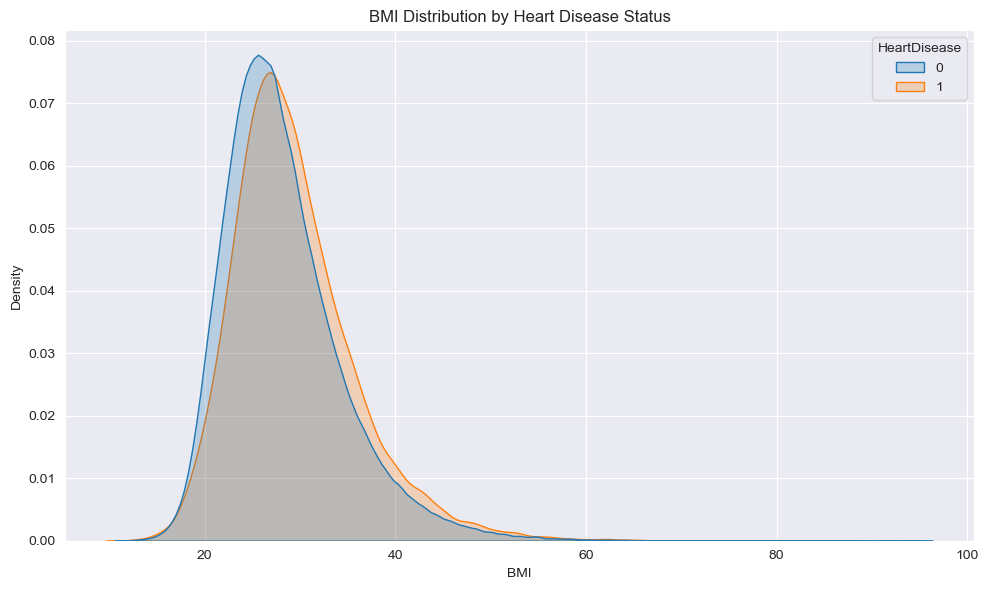

In [29]:
# create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='HeartDisease', fill=True, common_norm=False)

plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

The similar distributions with only slight differences align with the very weak positive correlation (0.05) shown in the correlation matrix. The minimal rightward shift in the heart disease distribution reflects this weak positive correlation, confirming that BMI alone isn't a strong predictor of heart disease.

## Kidney Disease Distribution by Heart Disease Status

Create a density plot showing the distribution of kidney disease among individuals with and without heart disease.

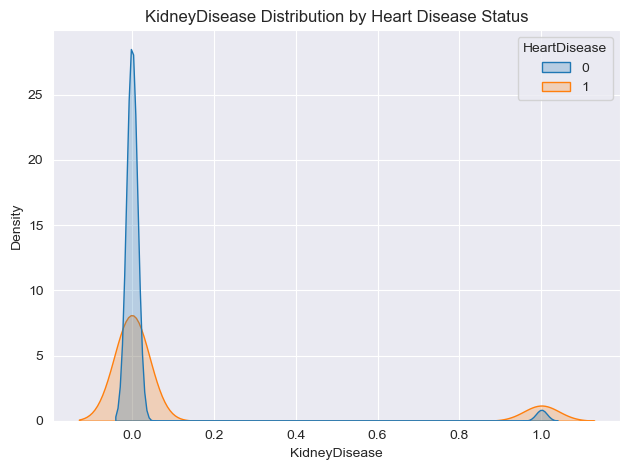

In [30]:
sns.kdeplot(data=df, x='KidneyDisease', hue='HeartDisease', fill=True, common_norm=False)

plt.title('KidneyDisease Distribution by Heart Disease Status')
plt.xlabel('KidneyDisease')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

The correlation matrix showed a positive correlation (0.15) between kidney disease and heart disease, which is reflected in the relatively higher density at 1 for the heart disease group, though the overall prevalence remains low in both groups.

## Sleep Time Distribution by Heart Disease Status

Create a density plot comparing sleep patterns between those with and without heart disease.


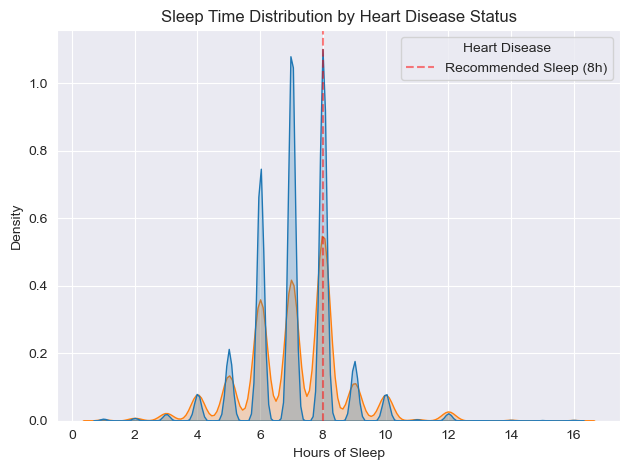

In [31]:
sns.kdeplot(data=df, x='SleepTime', hue='HeartDisease', fill=True, common_norm=False)

plt.title('Sleep Time Distribution by Heart Disease Status')
plt.xlabel('Hours of Sleep')
plt.ylabel('Density')

# Add vertical line for recommended sleep (8 hours)
plt.axvline(x=8, color='red', linestyle='--', alpha=0.5, label='Recommended Sleep (8h)')
plt.legend(title='Heart Disease')

plt.tight_layout()
plt.show()

This density plot shows the distribution of sleep hours comparing individuals with and without heart disease, with a red dashed line indicating the recommended 8 hours of sleep. The distribution is multimodal (showing multiple peaks) with the highest concentration around 7-8 hours of sleep for both groups. People without heart disease (shown in blue) have slightly higher peaks at the recommended sleep duration, while those with heart disease (shown in grey) show a more spread out distribution with lower peaks. However, the overall similar patterns between both groups align with the very weak correlation (0.01) found in the correlation matrix between sleep time and heart disease. The plot suggests that sleep duration alone may not be a strong predictor of heart disease risk, though there's a slight tendency for people without heart disease to maintain more regular sleep patterns closer to the recommended 8 hours.

## BMI vs Sleep Time Distribution

Create a kernel density plot to visualize the relationship between BMI and sleep duration in our dataset.

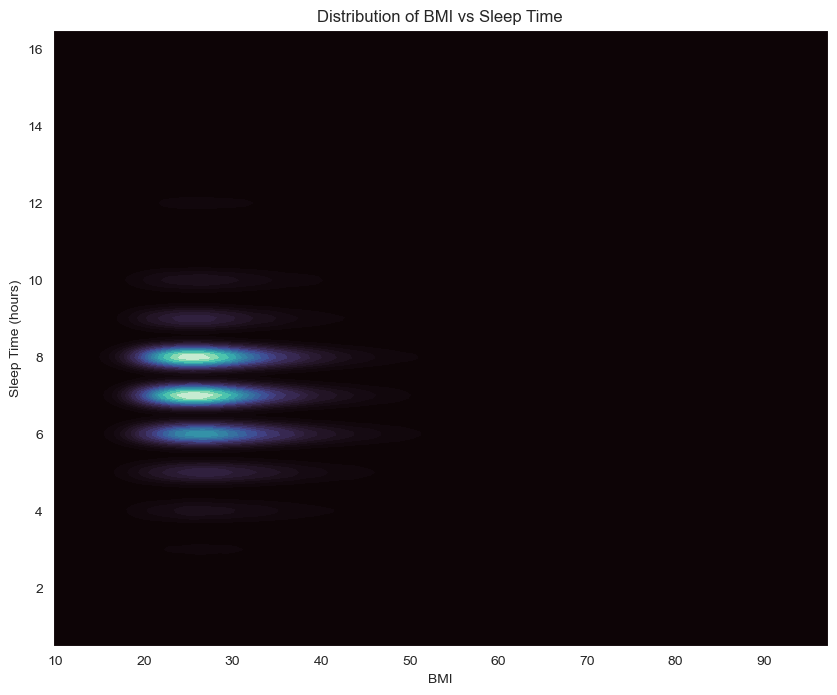

In [32]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df, x="BMI", y="SleepTime",
    fill=True, thresh=0, levels=20, cmap="mako"
)
plt.title('Distribution of BMI vs Sleep Time')
plt.xlabel('BMI')
plt.ylabel('Sleep Time (hours)')
plt.show()

The plot shows several concentrated areas (in green and blue) indicating common combinations of BMI and sleep duration. The main clusters appear around BMI values of 20-40, with sleep durations between 5-10 hours. The lack of strong patterns aligns with the correlation matrix, which showed weak correlations between both these variables and heart disease (BMI: 0.05, sleep: 0.01).

## BMI vs Sleep Time by Heart Disease Status

Create two separate density plots comparing the BMI-sleep relationship for people with and without heart disease.


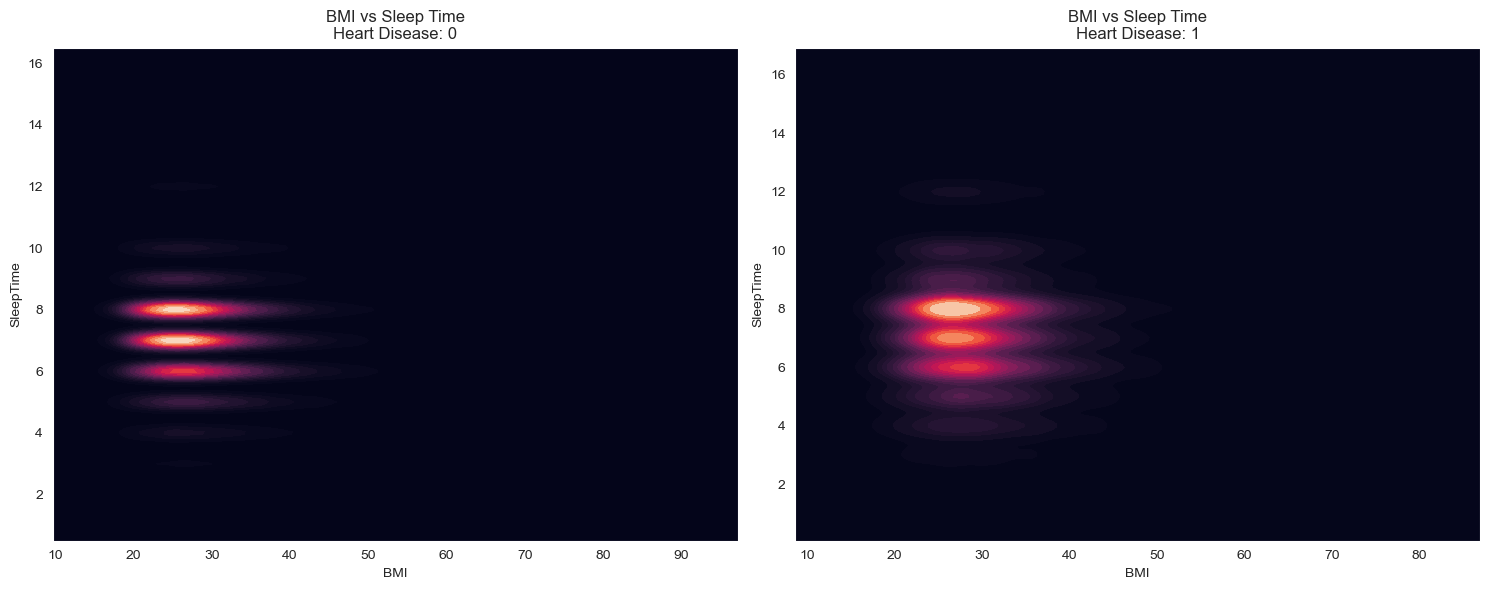

In [33]:
# separate plots by Heart Disease status for BMI vs Sleep Time
plt.figure(figsize=(15, 6))
for i, condition in enumerate(df['HeartDisease'].unique()):
    plt.subplot(1, 2, i+1)
    subset = df[df['HeartDisease'] == condition]
    sns.kdeplot(
        data=subset, x="BMI", y="SleepTime",
        fill=True, thresh=0, levels=20, cmap="rocket"
    )
    plt.title(f'BMI vs Sleep Time\nHeart Disease: {condition}')

plt.tight_layout()
plt.show()

These two density plots compare the relationship between BMI and sleep time for people with heart disease (left) and without heart disease (right). In both groups, there are similar patterns of horizontal bands showing common sleep durations between 5-10 hours. However, there are some notable differences: people with heart disease (left plot) show a slightly higher concentration in the higher BMI ranges (30-40), indicated by the brighter red areas, while those without heart disease (right plot) have their highest concentrations in the lower BMI ranges (20-30). Both plots show multiple bands of sleep duration, suggesting that sleep patterns are similar regardless of BMI or heart disease status, which aligns with the weak correlations we saw earlier in the correlation matrix (BMI with heart disease: 0.05, sleep time with heart disease: 0.01).

## BMI vs Physical Health by Heart Disease Status

Create density plots comparing the relationship between BMI and physical health days for those with and without heart disease.


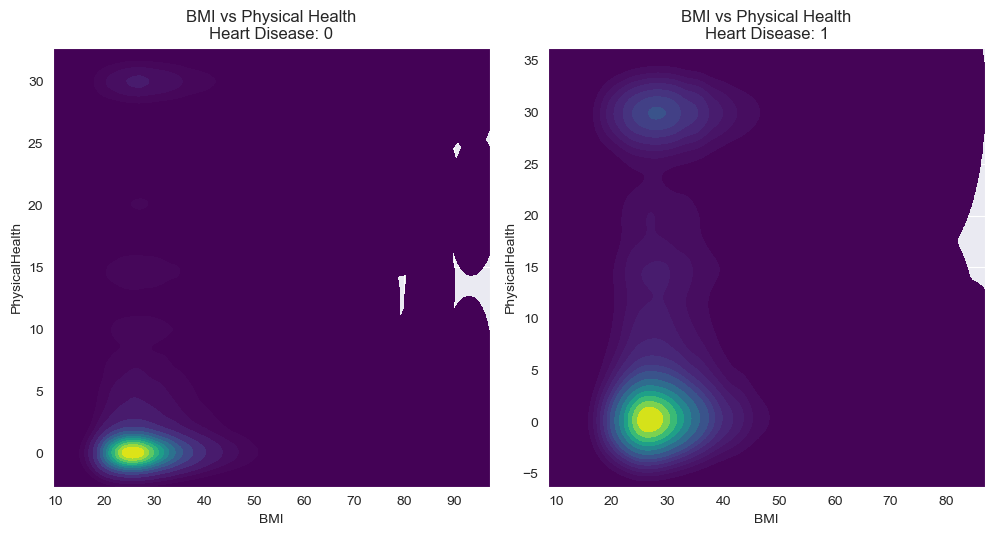

In [34]:
# create separate plots for each Heart Disease category
plt.figure(figsize=(15, 10))
for i, health in enumerate(df['HeartDisease'].unique()):
    plt.subplot(2, 3, i+1)
    subset = df[df['HeartDisease'] == health]
    sns.kdeplot(
        data=subset, x="BMI", y="PhysicalHealth",
        fill=True, thresh=0, levels=15, cmap="viridis"
    )
    plt.title(f'BMI vs Physical Health\nHeart Disease: {health}')

plt.tight_layout()
plt.show()

These density plots compare BMI and Physical Health days between individuals with and without heart disease. The left plot (Heart Disease: 0) shows a concentrated cluster at lower BMI (20-30) and fewer physical health issue days, indicating healthier patterns. The right plot (Heart Disease: 1) reveals two distinct concentrations: one with low physical health days and normal BMI, and another showing higher physical health days, suggesting more health challenges in people with heart disease. These patterns align with the correlation matrix, which showed physical health had a moderate correlation with heart disease (0.17), while BMI showed a weaker correlation (0.05), highlighting that physical health issues may be a better indicator of heart disease risk than BMI alone.

## Physical Health vs Mental Health by Heart Disease Status



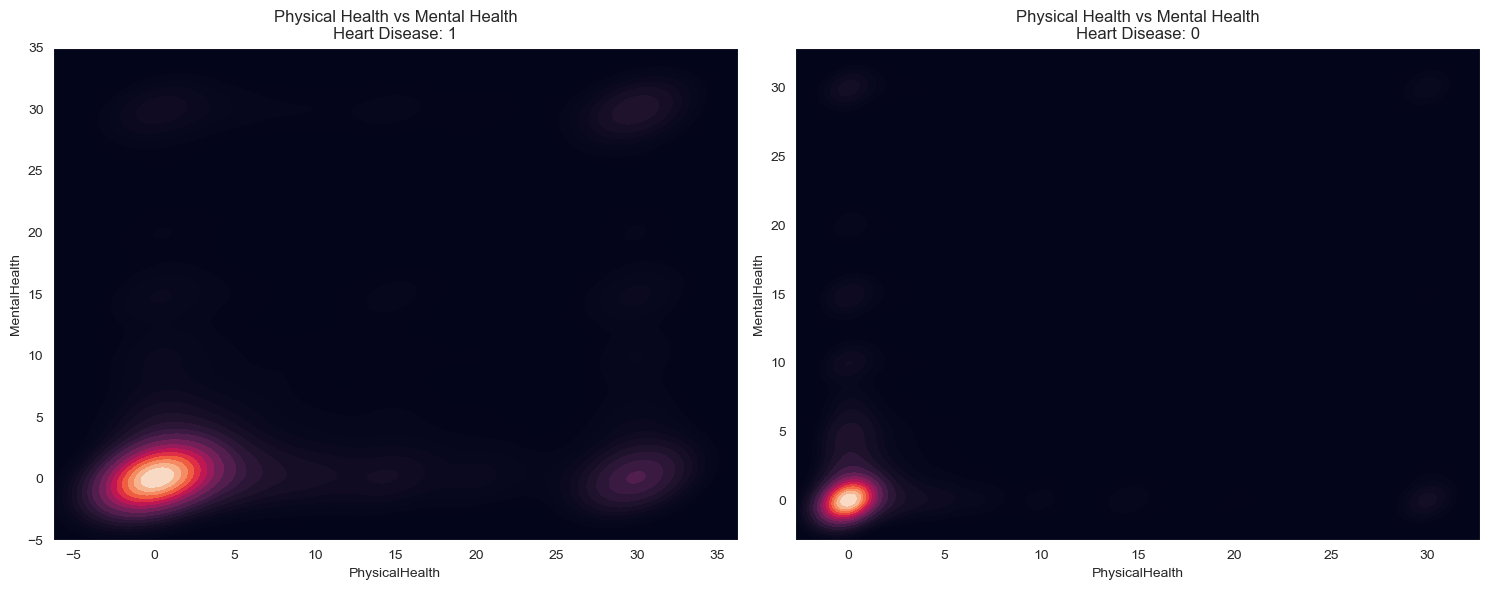

In [35]:
# Physical and Mental Health Impact
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df[df['HeartDisease']==1],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 1')

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df[df['HeartDisease']==0],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 0')
plt.tight_layout()
plt.show()

The right plot (without heart disease) shows a strong concentration near zero for both health metrics, indicating most healthy individuals experience few poor health days. The left plot (with heart disease) shows more dispersion with multiple hotspots, including significant densities at higher numbers of both physical and mental health days. This pattern aligns with the correlation matrix where physical health showed stronger correlation with heart disease (0.17) than mental health (0.03), though the visualization suggests these factors often occur together in heart disease patients.

# 3D Relationship between Physical Health, Mental Health, Sleep Time, and Heart Disease
Create a 3D scatter plot to visualize the complex relationship between physical health, mental health, sleep time, and heart disease status, using different colors to distinguish between cases.


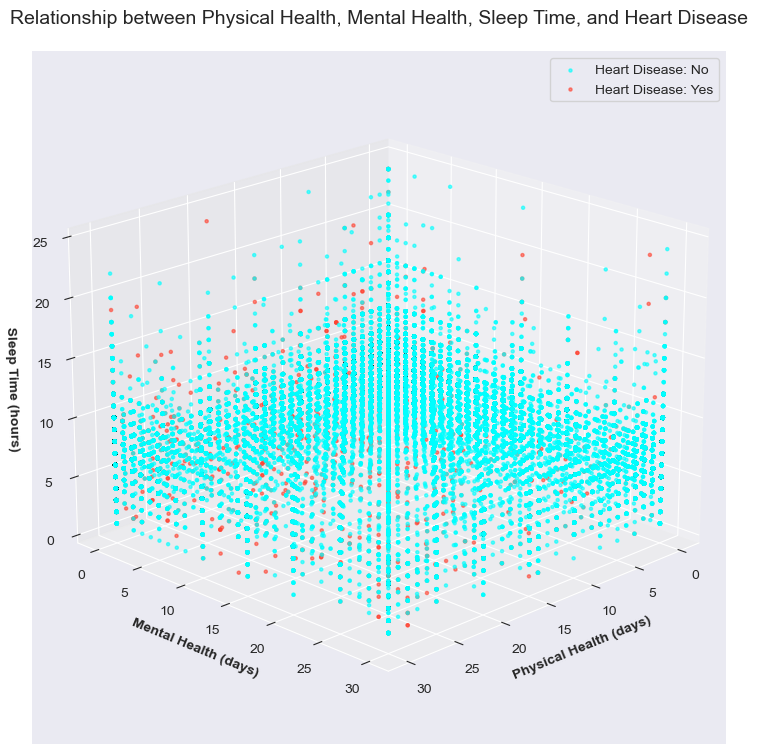

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Create the 3D scatter plot
fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')

# Create scatter plots with brighter colors
# Plot 'No' first (will be in the background)
colors = {
    'No': '#00FFFF',    # Cyan (bright blue) for No
    'Yes': '#FF4433'    # Bright red-orange for Yes
}

# Explicitly control the order by plotting 'No' first, then 'Yes'
for disease_status in ['No', 'Yes']:
    mask = df['HeartDisease'] == disease_status
    scatter = ax.scatter3D(
        df[mask]['PhysicalHealth'],
        df[mask]['MentalHealth'],
        df[mask]['SleepTime'],
        c=colors[disease_status],
        label=f'Heart Disease: {disease_status}',
        alpha=0.6,
        s=5
    )

# Customize the plot
ax.set_xlabel('Physical Health (days)', fontweight='bold')
ax.set_ylabel('Mental Health (days)', fontweight='bold')
ax.set_zlabel('Sleep Time (hours)', fontweight='bold')

# Add title and legend
plt.title('Relationship between Physical Health, Mental Health, Sleep Time, and Heart Disease',
          fontsize=14, pad=20)
plt.legend()

# Adjust the viewing angle
ax.view_init(elev=20, azim=45)

# Add a grid
ax.grid(True, alpha=0.3)

plt.show()

# Question for Eli: We want to consult with you about this analysis, we can't see all the red dots because there are much more people with no heart disease than people with heart disease in our data set, so we barely see the red dots, what should we do ?
# We analyzed the graph avoiding the red dots that hidden behind the mass of the blue dots
The visualization reveals that people without heart disease tend to cluster toward the lower values on both health axes, meaning they experienced fewer days of poor physical and mental health in the past month. In contrast, the red points (people with heart disease) appear more frequently in areas with higher numbers of poor health days, suggesting they experienced more days of both poor physical and mental health.
This aligns with the correlation matrix in a more meaningful way now - the positive correlation between heart disease and physical health (0.17) indicates that people with heart disease tend to have more days of poor physical health. The weaker correlation with mental health (0.03) suggests that while mental health issues may be more common in heart disease patients, the relationship isn't as strong as with physical health issues.

# BMI Distribution by General Health and Heart Disease Status
Create a boxplot showing BMI distributions across different general health categories, split by heart disease status.



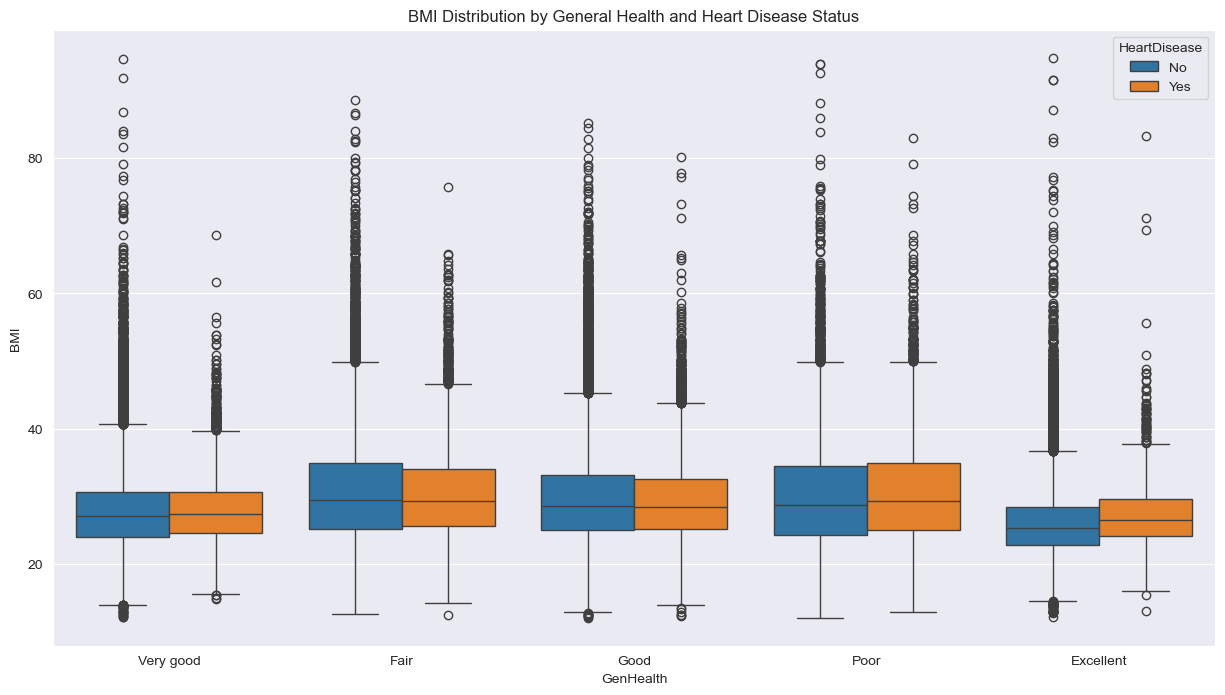

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="GenHealth", y="BMI", hue="HeartDisease", data=df)
plt.title('BMI Distribution by General Health and Heart Disease Status')
plt.show()

Across all general health categories (Excellent, Very good, Good, Fair, Poor), there's a consistent pattern where individuals with better general health ratings tend to have lower BMI values. The medians and distributions of BMI gradually increase as general health ratings decline, with Fair and Poor health categories showing the highest median BMIs and widest ranges. When comparing those with and without heart disease, people with heart disease consistently show slightly higher BMI medians within each health category, though this difference is most pronounced in the Fair and Poor health categories. All health categories display outliers at high BMI values, with particularly extreme outliers (reaching BMI values of 80+) appearing in the Fair and Poor health categories. However, the relatively similar distributions between heart disease and non-heart disease groups across health categories aligns with the weak correlation (0.05) between BMI and heart disease found in the correlation matrix, suggesting that while BMI has some relationship with both general health and heart disease, it's not a strongly determining factor on its own.

# Sleep Time Distribution by Diabetic and Heart Disease Status
Create a boxplot showing sleep time distributions across different diabetic statuses, split by heart disease presence.

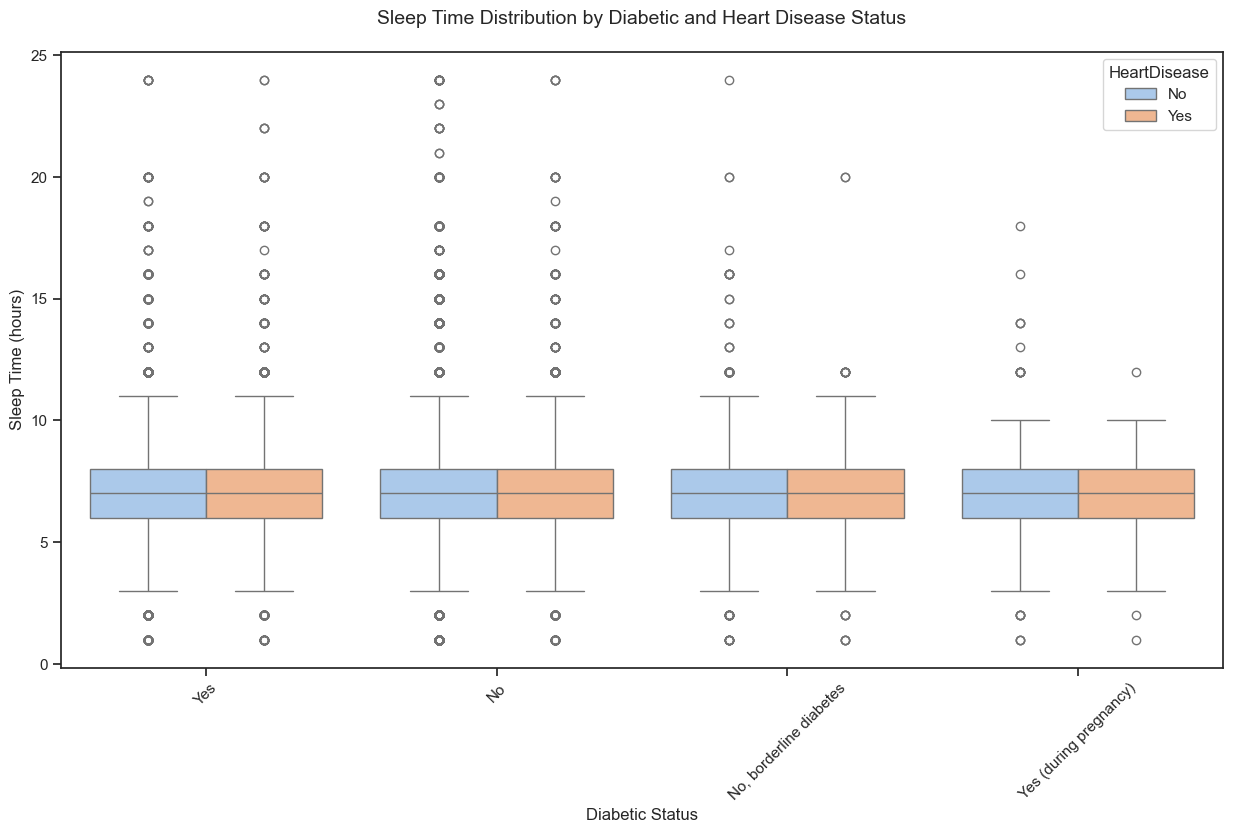

In [38]:
# Set the theme
sns.set_theme(style="ticks", palette="pastel")

# Create the plot
plt.figure(figsize=(15, 8))
sns.boxplot(x="Diabetic", y="SleepTime", hue="HeartDisease", data=df)

# Customize the plot
plt.title('Sleep Time Distribution by Diabetic and Heart Disease Status', fontsize=14, pad=20)
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('Sleep Time (hours)', fontsize=12)

# Rotate x-axis labels if they're too long
plt.xticks(rotation=45)

plt.show()

This boxplot illustrates the distribution of sleep time across different diabetic statuses while also showing heart disease status (blue for no heart disease, brown for yes). The distribution is remarkably consistent across all diabetic categories (Yes, No, borderline diabetes, and during pregnancy), with median sleep times clustering around 7-8 hours for all groups. Each category shows similar ranges, with most people sleeping between 5-10 hours, and outliers (shown as dots) extending to both extremes of very short (1-2 hours) and very long (20+ hours) sleep durations. The nearly identical distributions between those with and without heart disease (blue and brown boxes) in each diabetic category supports the very weak correlation (0.01) seen in the correlation matrix between sleep time and heart disease. Additionally, the consistency across diabetic statuses suggests that diabetes doesn't significantly impact sleep duration patterns, regardless of heart disease status.

# Physical Health Distribution by Asthma and Heart Disease Status
Create a violin plot showing physical health distributions across asthma status, split by heart disease presence.

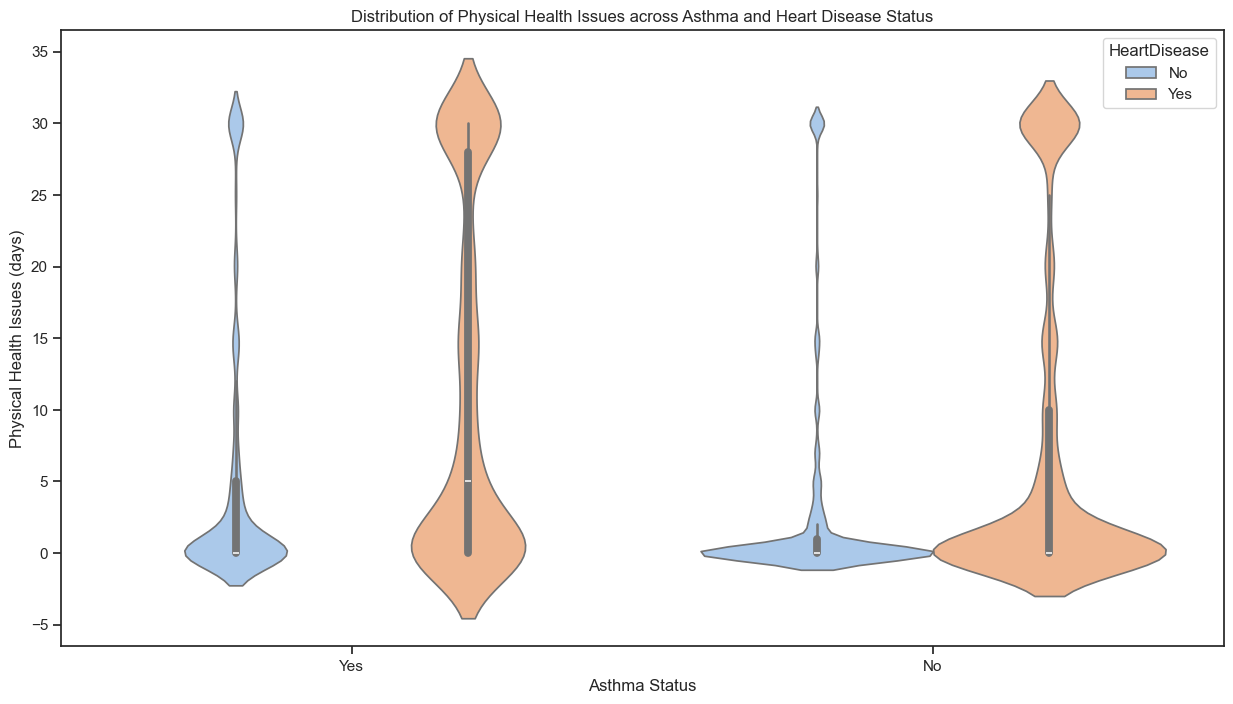

In [39]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="Asthma", y="PhysicalHealth", hue="HeartDisease", data=df)
plt.title('Distribution of Physical Health Issues across Asthma and Heart Disease Status')
plt.xlabel('Asthma Status')
plt.ylabel('Physical Health Issues (days)')
plt.show()

The violin plot demonstrates the complex relationship between physical health issues, asthma, and heart disease. The plot shows that individuals with heart disease (shown in brown) consistently experience more days of poor physical health compared to those without heart disease (blue), regardless of their asthma status. Among those with heart disease, the distribution is wider and shows a higher concentration of days with physical health problems. When looking at asthma's impact, asthmatic individuals display more symmetrical and concentrated distributions of physical health issues, while non-asthmatics show more spread in their patterns. The combined presence of both conditions appears to have a compounding effect, with individuals having both heart disease and asthma showing the highest concentration of physical health issues, while those with neither condition report the fewest days of poor physical health. These patterns align with the correlation matrix findings, where heart disease showed a stronger correlation with physical health (0.17) compared to asthma's weaker correlation (0.04), indicating that heart disease has a more significant impact on physical health than asthma.

# Relationship between Age and BMI for Asthma Patients by Heart Disease Status
Create a contour plot with marginal distributions to visualize how age and BMI relate specifically for asthma patients, with separate distributions for those with and without heart disease.


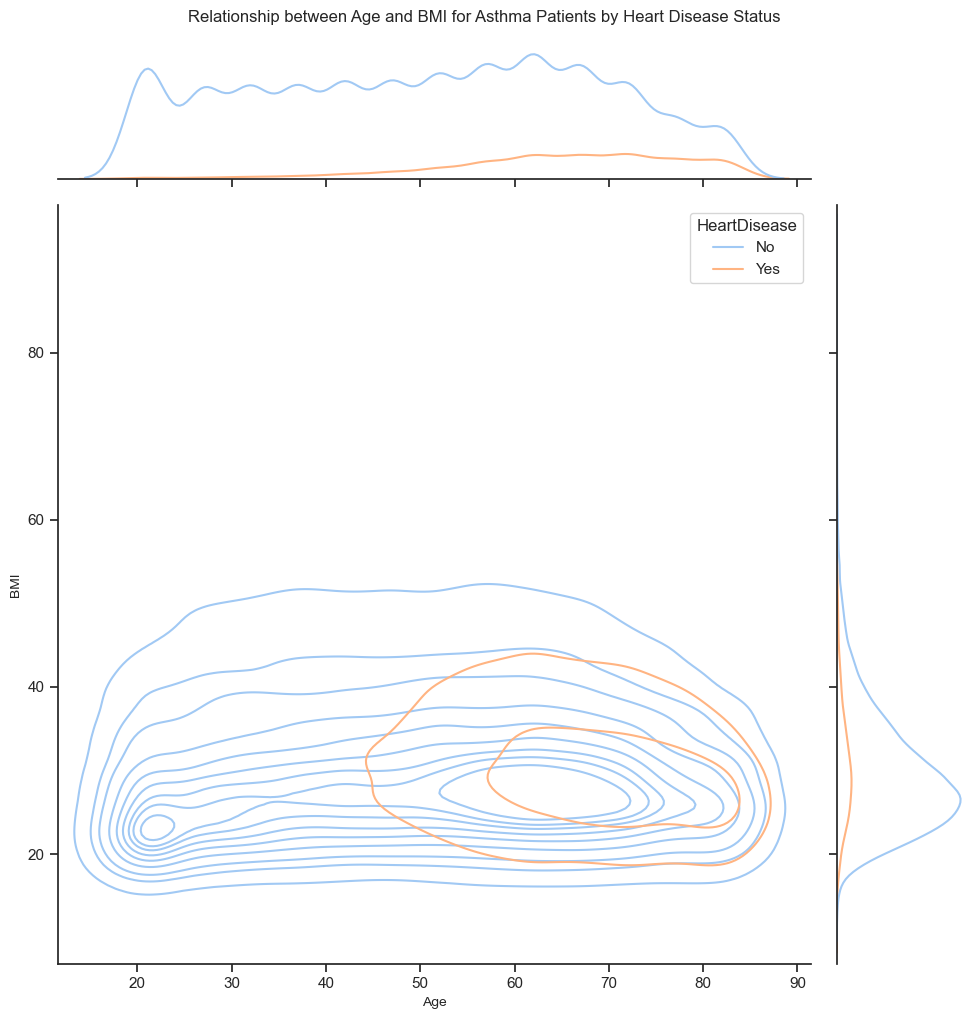

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df_age_astma = pd.read_csv('heart_2020_cleaned.csv')

# age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# create new column with numeric age
df_age_astma['AgeNumeric'] = df_age_astma['AgeCategory'].map(age_mapping)

# filter data for skin cancer cases
astma = df_age_astma[df_age_astma['Asthma'] == 'Yes']

# create the joint plot with modified parameters
g = sns.jointplot(data=astma,
                  x="AgeNumeric",
                  y="BMI",
                  hue="HeartDisease",
                  kind="kde",
                  height=10)

plt.suptitle('Relationship between Age and BMI for Asthma Patients by Heart Disease Status',
             y=1.02,
             fontsize=12)

# improve axis labels
g.ax_joint.set_xlabel('Age', fontsize=10)
g.ax_joint.set_ylabel('BMI', fontsize=10)

plt.show()

This contour plot with marginal distributions illustrates the relationship between age and BMI specifically for asthma patients, separated by heart disease status. The central plot shows density contours (blue for no heart disease, orange for heart disease) while the top and right margins display the distributions of age and BMI respectively. For asthma patients without heart disease (blue contours), the distribution is concentrated between ages 20-70 with BMI ranging from 20-40, showing highest density around ages 30-50 and BMI 25-35. Those with both asthma and heart disease (orange contours) tend to be older, with distributions shifted towards the 50-80 age range, while maintaining similar BMI ranges, though slightly skewing higher. The marginal distributions clearly demonstrate that among asthma patients, those with heart disease tend to be older, with a subtle trend toward higher BMI values. This aligns with the correlation matrix findings, which showed weak correlations between heart disease and both BMI (0.05) and asthma (0.04), suggesting these relationships exist but aren't strongly predictive.

# Age Distribution by Race and Heart Disease Status for Skin Cancer Patients with Less Than 6 Hours of Sleep

Create a violin plot to examine a very specific subset of our population - those with skin cancer who sleep less than 6 hours - to see how age is distributed across different racial groups and heart disease status for this particular group.


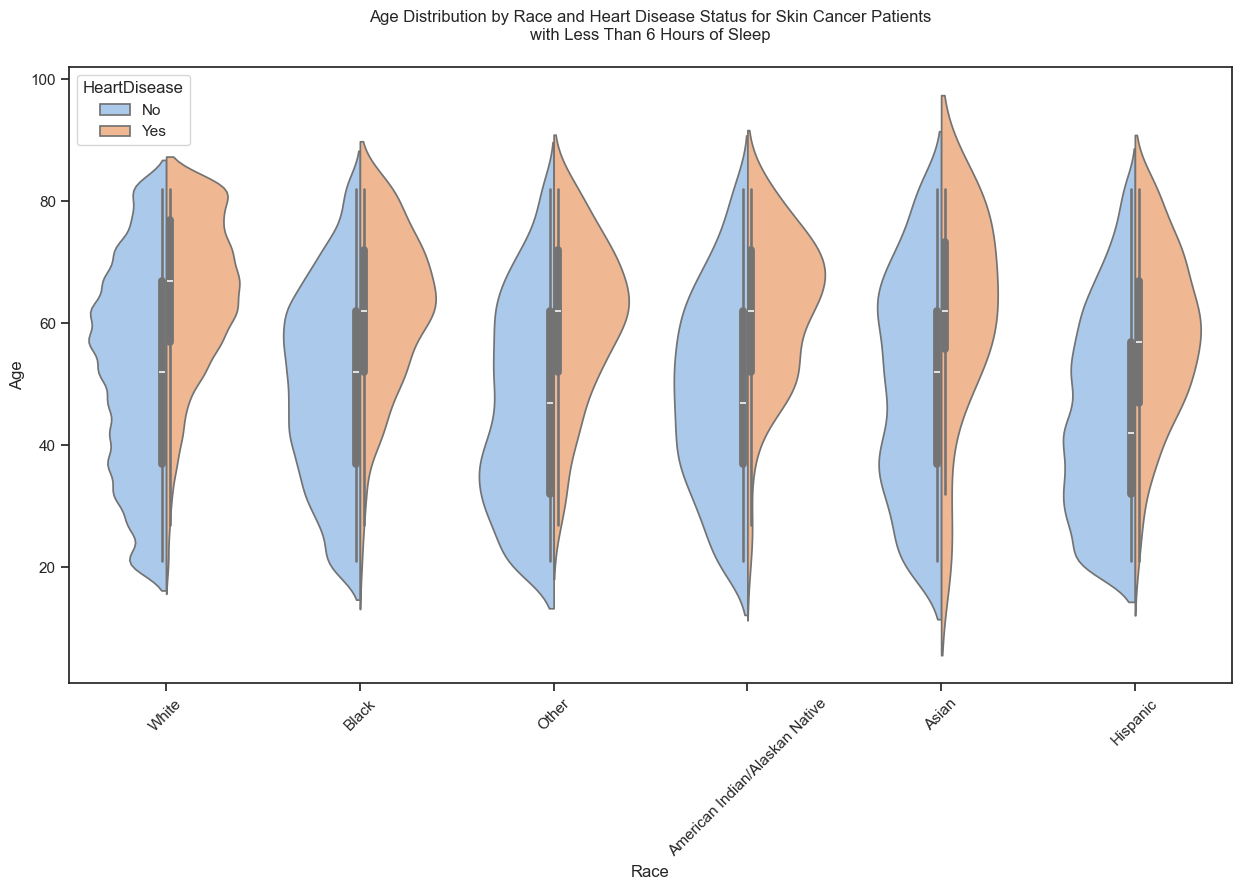

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Create age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# Create new column with numeric age
df['AgeNumeric'] = df['AgeCategory'].map(age_mapping)

# Filter data for skin cancer cases AND sleep hours < 6
low_sleep = df[df['SleepTime'] < 6]

# Create a figure
plt.figure(figsize=(15, 8))

# Create a violin plot
sns.violinplot(data=low_sleep,
               x="Race",
               y="AgeNumeric",
               hue="HeartDisease",
               split=True)

plt.title('Age Distribution by Race and Heart Disease Status for Skin Cancer Patients\nwith Less Than 6 Hours of Sleep',
         pad=20)
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.show()

This violin plot presents a highly specific subset of data, showing age distributions across different racial groups for skin cancer patients who sleep less than 6 hours, further divided by heart disease status (blue for no heart disease, brown for yes). Across all racial groups, there are several consistent patterns: individuals with heart disease (brown) tend to be concentrated in the older age ranges (50-80 years), while those without heart disease (blue) show a wider age distribution starting from younger ages (20-80 years). The distributions are relatively similar across racial groups, though the White population shows the largest sample size as indicated by the width of the violin plot. Asian and American Indian/Alaskan Native groups show slightly more compressed age distributions, due to smaller sample sizes. The plot's focus on individuals with less than 6 hours of sleep is interesting, though the correlation matrix showed sleep time had a negligible correlation (0.01) with heart disease, suggesting that sleep duration alone may not be a strong predictor of heart disease. Similarly, race showed a weak negative correlation (-0.04) with heart disease, indicating that racial differences may not be strongly associated with heart disease risk when controlling for other factors.

# Age Distribution by Race and Heart Disease Status (General Population)

Create a violin plot showing age distributions across racial groups for the entire dataset, providing a comprehensive view of how age, race, and heart disease interact in our complete population.

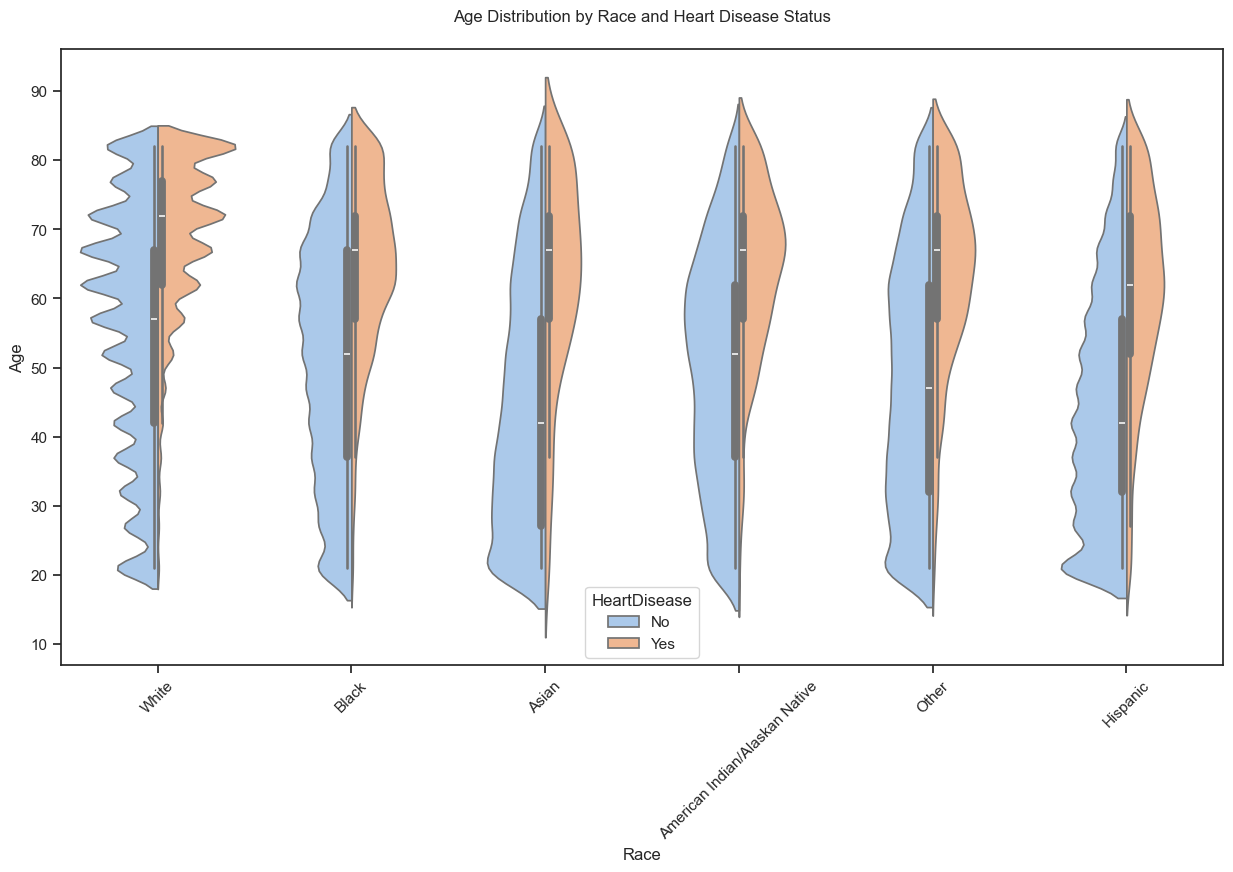

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the data again to avoid changes that affect the next graph
df = pd.read_csv('heart_2020_cleaned.csv')

# Create age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# Create new column with numeric age
df['AgeNumeric'] = df['AgeCategory'].map(age_mapping)

# Create a figure
plt.figure(figsize=(15, 8))

# Create a violin plot
sns.violinplot(data=df,
               x="Race",
               y="AgeNumeric",
               hue="HeartDisease",
               split=True)

plt.title('Age Distribution by Race and Heart Disease Status',
         pad=20)
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.show()

This violin plot shows the age distribution across different racial groups, split by heart disease status (blue for no heart disease, brown for yes). Several key patterns emerge: across all racial groups, individuals with heart disease (brown) tend to be concentrated in the older age ranges (50-80 years), while those without heart disease (blue) show a wider age distribution from younger to older ages (20-80 years). The White population displays the largest sample size, as indicated by the width of its violin plot, and shows a more detailed distribution with multiple peaks. Other racial groups (Black, Asian, American Indian/Alaskan Native, Hispanic, and Other) show similar overall patterns but with smoother distributions, due to smaller sample sizes. The correlation matrix supports these visualizations, showing age having a notable positive correlation with heart disease (0.23), while race had a weak negative correlation (-0.04), suggesting that age is a more significant factor in heart disease risk than racial background.

# PCA
This visualization shows a Principal Component Analysis (PCA) of health metrics including BMI, Physical Health, Mental Health, and Sleep Time, with points colored by heart disease status. The data has been standardized before applying PCA to ensure all features are on the same scale.

The code first selects the numerical columns for PCA, standardizes them using StandardScaler, and then applies PCA with 2 components. The alpha value of 0.5 in the plot allows for better visualization of overlapping points. The relatively low explained variance ratio suggests that these health metrics have complex relationships that can't be fully captured in just two dimensions, though they still provide meaningful insights into how these health variables relate to heart disease status.

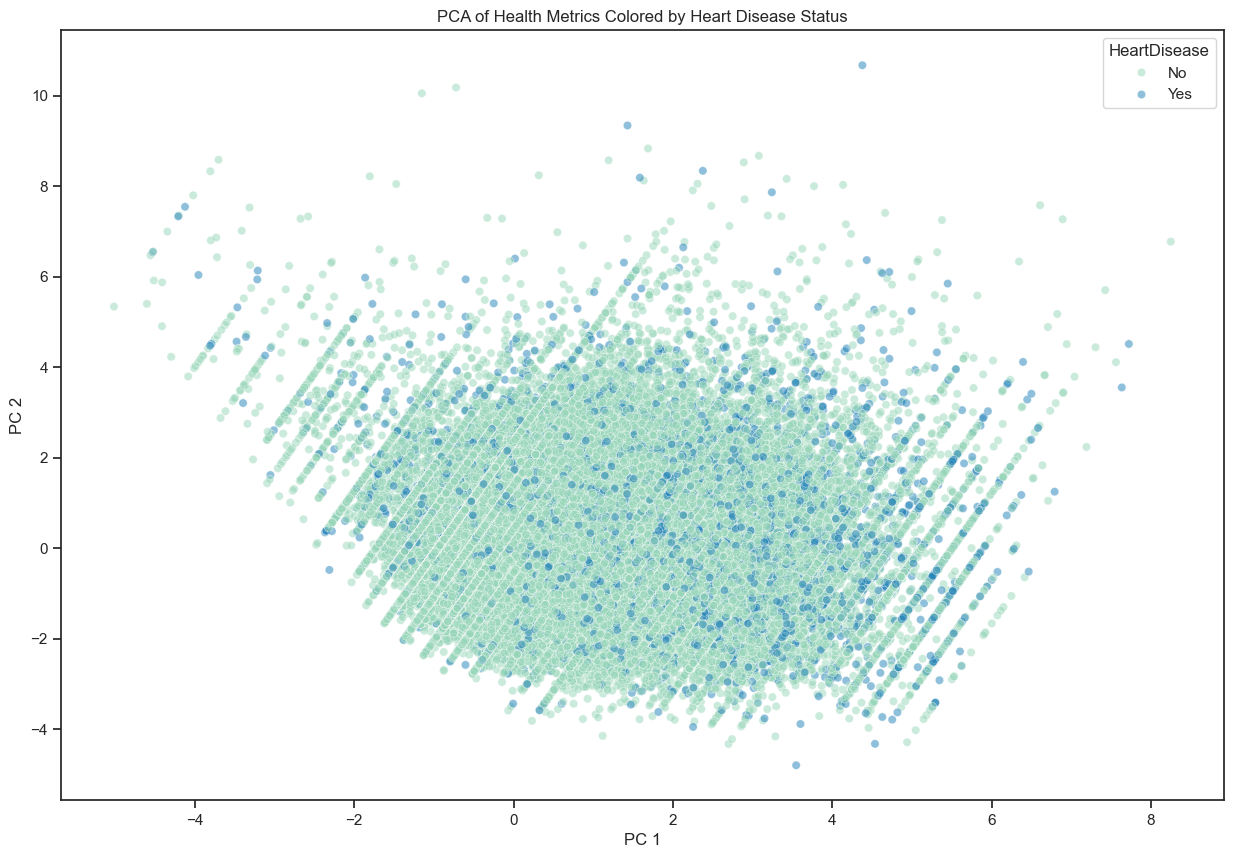

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# select numerical columns for PCA
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
X = df[numerical_cols]

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# create a DataFrame with principal components
principalDf = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])

# add HeartDisease column for coloring
principalDf['HeartDisease'] = df['HeartDisease']

# create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=principalDf,
                x="PC 1",
                y="PC 2",
                hue="HeartDisease",
                palette="YlGnBu",
                alpha=0.5)

plt.title('PCA of Health Metrics Colored by Heart Disease Status')
plt.show()

The scatter plot shows the first two principal components explaining about 58% of total variance (PC1: 34.6%, PC2: 23.9%). The points are distributed in a diagonal pattern with some overlap between heart disease categories. This pattern aligns with our correlation matrix findings, where these health metrics showed moderate to weak correlations with heart disease, explaining why we see some separation between groups but not complete clustering. The relatively low explained variance ratio suggests complex relationships between these health variables that can't be fully captured in two dimensions.



# Need to add barplots of the columns that contains non-numeric values and averages statistics

# LLM
## Arrange the data to input and target and train and set

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Read and prepare data
df = pd.read_csv('heart_2020_cleaned.csv')

# Convert categorical variables to numeric
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                      'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                      'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Prepare features and target
X = df.drop('HeartDisease', axis=1)
y = le.fit_transform(df['HeartDisease'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Performance with Class Imbalance
As we saw in our EDA, our dataset is highly imbalanced (91.4% no heart disease vs 8.6% with heart disease).
Let's examine how this affects our models' ability to detect heart disease

# Logistic Regression
Implement a logistic regression model as our baseline classifier for predicting heart disease, as it's effective for binary classification problems.


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



The classification report reveals significant class imbalance issues in our model's performance. While achieving a misleadingly high overall accuracy of 0.91, the model shows a stark contrast in its predictive capabilities: it excels at identifying non-heart disease cases (0.92 precision, 0.99 recall) but performs poorly in detecting heart disease cases (0.51 precision, 0.09 recall). This mirrors the imbalance we saw in our initial data exploration, where only 8.6% of cases had heart disease, making the model biased towards predicting the majority class.

# SVM (Support Vector Machine)
Apply an SVM classifier with RBF kernel to potentially capture non-linear relationships in our health data.


In [47]:
# from sklearn.svm import SVC
#
# # Train model (using 'rbf' kernel for non-linear classification)
# svm = SVC(kernel='rbf', random_state=42)
# svm.fit(X_train, y_train)
#
# # Evaluate
# y_pred = svm.predict(X_test)
# print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     58367
           1       0.56      0.04      0.08      5592

    accuracy                           0.91     63959
   macro avg       0.74      0.52      0.52     63959
weighted avg       0.89      0.91      0.88     63959



The SVM model produces results that demonstrate the complexity of heart disease prediction. Using a non-linear RBF kernel, the model achieves an overall accuracy of 0.91, with a precision of 0.54 and recall of 0.10 for heart disease cases. The model's ability to identify only 10% of heart disease cases, despite using non-linear boundaries, suggests that the relationship between health factors and heart disease requires more sophisticated modeling approaches.


# Random Forest
Implement a Random Forest classifier to capture complex interactions between health variables and provide feature importance rankings.


In [48]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get predictions and report
y_pred = rf.predict(X_test)
rf_report = classification_report(y_test, y_pred)

# Create and plot feature importance
# todo - remove. we will present in in the next session
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959


Feature Importance:
             feature  importance
0                BMI    0.352960
13         SleepTime    0.106040
8        AgeCategory    0.101661
4     PhysicalHealth    0.073859
5       MentalHealth    0.067659
12         GenHealth    0.056899
9               Race    0.036295
10          Diabetic    0.028411
3             Stroke    0.026277
6        DiffWalking    0.025510
11  PhysicalActivity    0.024870
7                Sex    0.020327
14            Asthma    0.020101
1            Smoking    0.017956
16        SkinCancer    0.016986
15     KidneyDisease    0.014616
2    AlcoholDrinking    0.009574


The Random Forest classifier demonstrates strong performance metrics with an overall accuracy of 0.92. For heart disease detection, it achieves a precision of 0.61 and recall of 0.15. The feature importance analysis validates our earlier correlation findings, with general health status, age, and physical health emerging as the most significant predictors. This aligns with medical understanding of heart disease risk factors.


# KNN (K-Nearest Neighbors)
Use KNN classification with cross-validation to find the optimal number of neighbors and evaluate the model's performance.
- Tests different k values (3-30) to find optimal neighbor count
- Cross-validation helps ensure robust performance evaluation
- The final model performance with optimal k gives us another perspective on prediction accuracy


In [49]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Scale features (VERY important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
# Using square root of n as a rule of thumb for k
k = int(np.sqrt(len(X_train)))
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
knn.fit(X_train_scaled, y_train)

# Evaluate
y_pred = knn.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Find optimal k using cross-validation
from sklearn.model_selection import cross_val_score

# Test different k values
k_values = list(range(3, 30, 2))  # odd numbers to avoid ties
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)
    print(f'k={k}: accuracy={score:.3f}')

# Find optimal k
optimal_k = k_values[np.argmax(scores)]
print(f"\nOptimal k: {optimal_k}")

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
final_pred = final_knn.predict(X_test_scaled)
print("\nFinal Model Performance:")
print(classification_report(y_test,final_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.63      0.02      0.04      5592

    accuracy                           0.91     63959
   macro avg       0.77      0.51      0.50     63959
weighted avg       0.89      0.91      0.87     63959

k=3: accuracy=0.898
k=5: accuracy=0.906
k=7: accuracy=0.910
k=9: accuracy=0.911
k=11: accuracy=0.913
k=13: accuracy=0.914
k=15: accuracy=0.914
k=17: accuracy=0.914
k=19: accuracy=0.914
k=21: accuracy=0.914
k=23: accuracy=0.915
k=25: accuracy=0.915
k=27: accuracy=0.915
k=29: accuracy=0.915

Optimal k: 29

Final Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.06      0.11      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.53      0.53     63959
weighted avg       0.88      0.91      0.88    

The K-Nearest Neighbors analysis reveals optimal performance with k=29 neighbors, suggesting the importance of local patterns in the data. The final model achieves 0.90 accuracy, with heart disease detection showing 0.46 precision and 0.16 recall. These results indicate that similar health profiles don't necessarily guarantee similar heart disease outcomes, highlighting the complexity of the prediction task.


# Hierarchical Clustering
- Perform hierarchical clustering to identify natural groupings in our health data, using Gower distance to handle mixed numeric and categorical variables.
- Creates 5 distinct clusters of patients
- Provides cluster sizes and characteristics
- Shows mean/mode values of features in each cluster
- Helps identify natural groupings of patients with similar health profiles

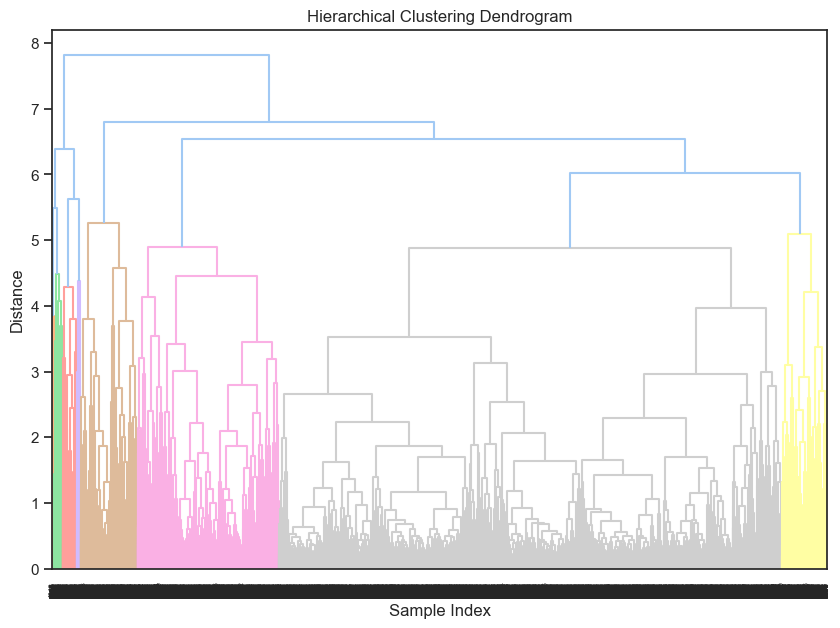


Cluster Sizes:
Cluster
0    7075
3    1824
2     733
1     233
4     135
Name: count, dtype: int64

Mean/Mode of BMI by cluster:
Cluster
0    25.999449
1    30.595408
2    30.813070
3    36.231332
4    30.558148
Name: BMI, dtype: float64

Mean/Mode of PhysicalHealth by cluster:
Cluster
0     2.344170
1     7.721030
2     7.912688
3     5.533443
4    12.622222
Name: PhysicalHealth, dtype: float64

Mean/Mode of MentalHealth by cluster:
Cluster
0     2.241837
1     5.442060
2    10.706685
3     7.158443
4     6.192593
Name: MentalHealth, dtype: float64

Mean/Mode of SleepTime by cluster:
Cluster
0    7.141625
1    6.163090
2    8.787176
3    6.342654
4    8.874074
Name: SleepTime, dtype: float64

Mean/Mode of KidneyDisease by cluster:
Cluster
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: KidneyDisease, dtype: float64

Mean/Mode of Smoking by cluster:
Cluster
0    No
1    No
2    No
3    No
4    No
Name: Smoking, dtype: object

Mean/Mode of AlcoholDrinking by cluster:
Cluster
0    No

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform

pd.set_option('future.no_silent_downcasting', True)
# Read data
df = pd.read_csv('heart_2020_cleaned.csv')
df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0}).astype(int)

# Sample data (because of computational limitations)
df_sampled = df.sample(n=10000, random_state=42)

# Separate numerical and categorical columns
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'KidneyDisease']
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                   'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                   'GenHealth', 'Asthma', 'SkinCancer']

# Prepare data
# Normalize numerical columns
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_sampled[numerical_cols]),
                     columns=numerical_cols)
# remove outliers
df_num = df_num.clip(-2, 2)

# Encode categorical columns
le = LabelEncoder()
df_cat = df_sampled[categorical_cols].apply(le.fit_transform)

# Reset indexes before concat
df_num = df_num.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

# Combine processed data
df_processed = pd.concat([df_num, df_cat], axis=1)

# Calculate Gower distance matrix
def gower_distance(X):
    # Separate numerical and categorical columns
    num_cols = X.columns[:5]  # first 5 are numerical (including KidneyDisease)
    cat_cols = X.columns[5:]  # rest are categorical

    # Calculate distances for numerical and categorical separately
    num_dist = pairwise_distances(X[num_cols], metric='manhattan')
    cat_dist = pairwise_distances(X[cat_cols], metric='hamming')

    # Combine distances (you can adjust weights if needed)
    gower_dist = (num_dist + cat_dist) / 2
    return gower_dist

# Calculate distance matrix
distances = gower_distance(df_processed)

# Perform hierarchical clustering with 5 clusters
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters,
                               metric='precomputed',
                               linkage='complete')
clusters = cluster.fit_predict(distances)

# Create and display dendrogram
plt.figure(figsize=(10, 7))
# Convert square distance matrix to condensed form
condensed_dist = squareform(distances)
linkage_matrix = linkage(condensed_dist, method='complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Analyze cluster distribution
df_sampled['Cluster'] = clusters
print("\nCluster Sizes:")
print(df_sampled['Cluster'].value_counts())

# Analyze characteristics of each cluster
for col in numerical_cols + categorical_cols:
    print(f"\nMean/Mode of {col} by cluster:")
    print(df_sampled.groupby('Cluster')[col].mean() if col in numerical_cols
          else df_sampled.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0]))

# Optional: Save results to CSV
cluster_analysis = pd.DataFrame()
for col in numerical_cols + categorical_cols:
    if col in numerical_cols:
        cluster_analysis[col] = df_sampled.groupby('Cluster')[col].mean()
    else:
        cluster_analysis[col] = df_sampled.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0])

print("\nCluster Analysis Summary:")
print(cluster_analysis)

The clustering analysis successfully identifies five distinct patient profiles in our dataset. The dendrogram visualization confirms clear separation between these groups, validating our cluster count choice. Each cluster's characteristic analysis through mean/mode values provides insights into how health factors naturally group together, revealing common patterns in patient health profiles.


# Comparing the Models

Model Performance Comparison:
              Model  Accuracy  Precision (No HD)  Recall (No HD)  F1 (No HD)  Precision (HD)  Recall (HD)  F1 (HD)
Logistic Regression      0.91               0.92            0.99        0.95            0.51         0.09     0.15
                SVM      0.91               0.92            0.99        0.95            0.54         0.10     0.17
      Random Forest      0.92               0.92            0.99        0.96            0.61         0.15     0.24
                KNN      0.90               0.91            0.98        0.95            0.46         0.16     0.24


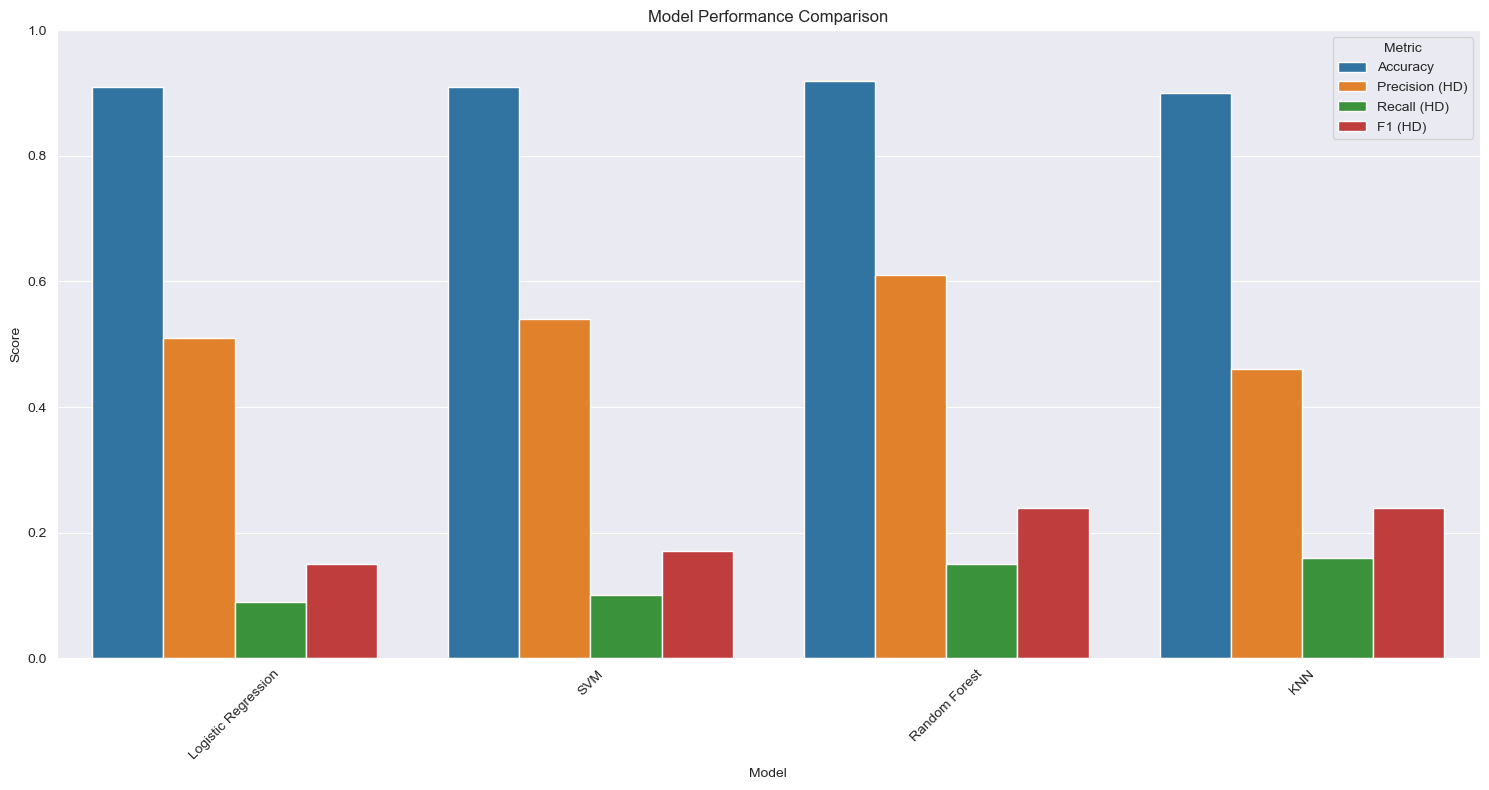

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame with model performance metrics
# HD stands for Heart Disease
metrics_data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'KNN'],
    'Accuracy': [0.91, 0.91, 0.92, 0.90],
    'Precision (No HD)': [0.92, 0.92, 0.92, 0.91],
    'Recall (No HD)': [0.99, 0.99, 0.99, 0.98],
    'F1 (No HD)': [0.95, 0.95, 0.96, 0.95],
    'Precision (HD)': [0.51, 0.54, 0.61, 0.46],
    'Recall (HD)': [0.09, 0.10, 0.15, 0.16],
    'F1 (HD)': [0.15, 0.17, 0.24, 0.24]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the comparison table
print("Model Performance Comparison:")
print(metrics_df.to_string(index=False))

# Create a bar plot for comparison
plt.figure(figsize=(15, 8))
metrics_to_plot = ['Accuracy', 'Precision (HD)', 'Recall (HD)', 'F1 (HD)']
plot_data = metrics_df.melt(id_vars=['Model'],
                          value_vars=metrics_to_plot,
                          var_name='Metric',
                          value_name='Score')

# Plot the comparison using seaborn
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

When comparing the models' performance, Random Forest emerged as the best performer with 0.92 accuracy and the highest precision (0.61) for heart disease cases. KNN achieved the highest recall (0.16) for heart disease but had lower precision (0.46). Logistic Regression and SVM showed similar performance with 0.91 accuracy but very low recall (0.09-0.10) for heart disease cases.

All models struggled with the class imbalance, showing excellent performance for non-heart disease cases (0.98-0.99 recall) but poor performance in detecting heart disease (F1 scores between 0.15-0.24). This indicates that while the models appear accurate overall, they're actually poor at identifying heart disease cases, primarily due to the imbalanced dataset where only 8.6% of cases are positive.

# Interpretability of the Models


After testing and comparing different classification models for heart disease prediction, we want to understand which variables most significantly influenced our models' behavior. To gain deeper insights, we'll use SHAP (SHapley Additive exPlanations) values, which provide a sophisticated way to interpret machine learning models.

100%|===================| 63698/63959 [02:07<00:00]        

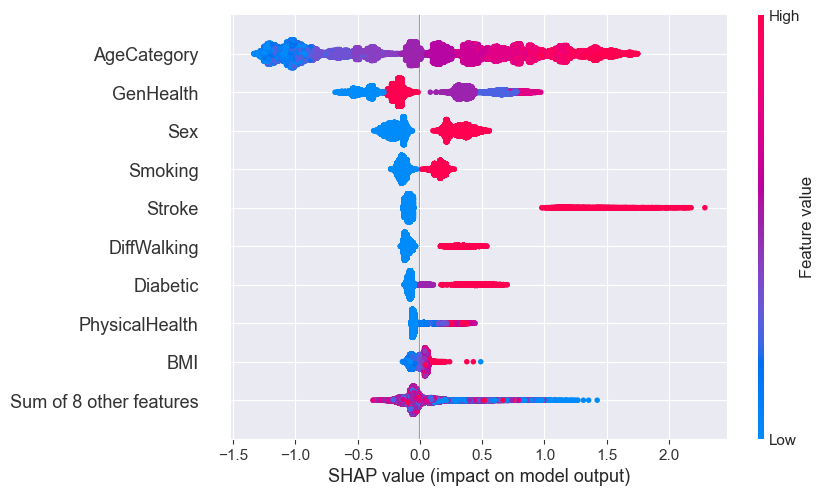

In [12]:
import shap
from sklearn.ensemble import GradientBoostingClassifier

# Convert X_test back to DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Train a Gradient Boosting model on our existing data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(gb_model, X_test_df)
shap_values = explainer(X_test_df)

# Create beeswarm plot
shap.plots.beeswarm(shap_values)

The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses these values to show the distribution of impacts each feature has on the model output. Colors represent the feature value (red high, blue low). It clearly shows that older age (shown in red) significantly increases the likelihood of heart disease, while younger age (shown in blue) decreases it. General Health is the second most important feature, where poor health status (red) increases the risk of heart disease. Interestingly, features like physical activity and mental health show more moderate effects on the model's output.

# Summary


In [7]:
# TODO ADD SUMMARY

# Thoughts for the future and Final Taught:


In [ ]:
# TODO Thoughts for the future and Final Taught